## 3. Feature Engineering
- 제공받은 데이터를 활용해서 모델링에 사용할 다양한 feature을 만든다
(겹치는 feature들은 추후 4. Feature Selection 과정에서 중복을 제거한다)

#### Feature 생성, Merging 과정

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
from IPython.display import Image 

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.base import ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, clear_output
print(tf.__version__)


# clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

#json
from bs4 import BeautifulSoup
import urllib.request as ul
import time
import xmltodict
import json
import sys
import io

import xml.etree.ElementTree as ET
import xmltodict
import json
import datetime


#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

2.4.1


#### Loading Data

In [2]:
foodwaste=pd.read_csv('01_제공데이터/01_음식물쓰레기_FOOD_WASTE.csv',encoding='cp949')
udongkor=pd.read_csv('01_제공데이터/02-1_내국인유동인구_KOREAN.csv',encoding='cp949')
longtermfrgn=pd.read_csv('01_제공데이터/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv',encoding='cp949')
shorttermfrgn=pd.read_csv('01_제공데이터/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv',encoding='cp949')
residentpop=pd.read_csv('01_제공데이터/03_거주인구_RESIDENT_POP.csv',encoding='cp949')
cardspending=pd.read_csv('01_제공데이터/04_음식관련 카드소비_CARD_SPENDING.csv',encoding='cp949')

#### Making Features

In [318]:
features = []

- 총, 평균, 표준편차, 최대, 최소 배출량

In [319]:
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].agg([('em_g', np.sum),
                                            ('em_g_mean', lambda x : np.round(np.mean(x))),
                                            ('em_g_std' , lambda x : np.round(np.std(x))),
                                            ('em_g_max', np.max),
                                            ('em_g_min', np.min)]).reset_index()
features.append(f)

- 총, 평균, 표준편차, 최대, 최소 배출건수

In [320]:
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_cnt'].agg([('em_cnt_sum', np.sum),
                                            ('em_cnt_mean', lambda x : np.round(np.mean(x))),
                                            ('em_cnt_std' , lambda x : np.round(np.std(x))),
                                            ('em_cnt_max', np.max),
                                            ('em_cnt_min', np.min)]).reset_index()

features.append(f)

- 총, 평균, 표준편차, 최대, 최소 지불금액

In [321]:
f = foodwaste.groupby(['base_date', 'emd_nm'])['pay_amt'].agg([('pay_amt_sum', np.sum),
                                            ('pay_amt_mean', lambda x : np.round(np.mean(x))),
                                            ('pay_amt_std' , lambda x : np.round(np.std(x))),
                                            ('pay_amt_max', np.max),
                                            ('pay_amt_min', np.min)]).reset_index()

features.append(f)

- 1회평균배출량

In [322]:
f = (foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].sum() / foodwaste.groupby(['base_date', 'emd_nm'])['em_cnt'].sum()).reset_index()
f.columns = ['base_date' , 'emd_nm' , '한회평균배출량']

features.append(f)

- 1회평균지불금액

In [323]:
f = (foodwaste.groupby(['base_date', 'emd_nm'])['pay_amt'].sum() / foodwaste.groupby(['base_date', 'emd_nm'])['em_cnt'].sum()).reset_index()
f.columns = ['base_date' , 'emd_nm' , '한회평균지불금액']

features.append(f)

- 배출거점지역종류

In [324]:
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_area_cd'].nunique().reset_index()
f.columns = ['base_date' , 'emd_nm' , '배출거점지역종류']

features.append(f)

- emg_sum_diff31

In [325]:
d = []
dong = foodwaste.emd_nm.unique()
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].agg([('em_g', np.sum)]).reset_index()

for i in dong : 
    data = f.query(' emd_nm == @i')
    data.sort_values(by = 'base_date' , inplace = True )
    data['em_g_sum_diff31'] = data['em_g'].shift(31)
    data = data.drop('em_g' , axis = 1 )
    d.append(data)

data = d[0]

for i in d[1:] :
    data = pd.concat( [data , i], axis = 0 )
    
features.append(data)

- 전날대비배출량 (em_g_before)

In [326]:
d = []
dong = foodwaste.emd_nm.unique()
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].agg([('em_g', np.sum)]).reset_index()

for i in dong : 
    data = f.query(' emd_nm == @i')
    data.sort_values(by = 'base_date' , inplace = True )
    data['before'] = data['em_g'].shift(1)
    data['em_g_before'] = data['em_g'] / data['before']
    data = data.drop(['em_g' , 'before'] , axis = 1 )
    d.append(data)

data = d[0]

for i in d[1:] :
    data = pd.concat( [data , i], axis = 0 )
    
features.append(data) 

- 한달 전 대비 배출량

In [327]:
d = []
dong = foodwaste.emd_nm.unique()
f = foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].agg([('em_g', np.sum)]).reset_index()

for i in dong : 
    data = f.query(' emd_nm == @i')
    data.sort_values(by = 'base_date' , inplace = True )
    data['month_ago'] = data['em_g'].shift(31)
    data['em_g_month_ago'] = data['em_g'] / data['month_ago']
    data = data.drop(['em_g' , 'month_ago'] , axis = 1 )
    d.append(data)

data = d[0]

for i in d[1:] :
    data = pd.concat( [data , i], axis = 0 )
    
features.append(data) 

In [328]:
f1 = features[0]

for i in features[1:] : 
    f1 = f1.merge( i , how = 'left' , on = ['base_date' , 'emd_nm' ])

In [329]:
card = []

- 총, 평균, 표준편차, 최대, 최소 카드결제건수

In [330]:
f = cardspending.groupby(['base_date', 'emd_nm'])['use_cnt'].agg([('use_cnt_sum', np.sum),
                                            ('use_cnt_mean', lambda x : np.round(np.mean(x))),
                                            ('use_cnt_std' , lambda x : np.round(np.std(x))),
                                            ('use_cnt_max', np.max),
                                            ('use_cnt_min', np.min)]).reset_index()

card.append(f)

- 총, 평균, 표준편차, 최대, 최소 카드결제액

In [331]:
f = cardspending.groupby(['base_date', 'emd_nm'])['use_amt'].agg([('use_amt_sum', np.sum),
                                            ('use_amt_mean', lambda x : np.round(np.mean(x))),
                                            ('use_amt_std' , lambda x : np.round(np.std(x))),
                                            ('use_amt_max', np.max),
                                            ('use_amt_min', np.min)]).reset_index()
card.append(f)

- 1회평균결제금액

In [332]:
f = (cardspending.groupby(['base_date', 'emd_nm'])['use_amt'].sum() / cardspending.groupby(['base_date', 'emd_nm'])['use_cnt'].sum()).reset_index()
f.columns = ['base_date' , 'emd_nm' , '한회평균결제금액']
card.append(f)

- 업종코드종류

In [333]:
f = cardspending.groupby(['base_date', 'emd_nm'])['mct_cat_cd'].nunique().reset_index()
f.columns = ['base_date' , 'emd_nm' , '업종코드종류']
card.append(f)

In [334]:
f_card = card[0]

for i in card[1:] : 
    f_card = f_card.merge( i , how = 'left' , on = ['base_date' , 'emd_nm' ])

- Merging 1

In [335]:
f_card['base_date'] = f_card['base_date'].astype('str')
f1['base_date'] = f1['base_date'].astype('str')

jh_feature = f1.merge( f_card , how = 'left' , on = ['base_date' , 'emd_nm' ])

- 내국인 유동인구의 (날짜별, 지역별) 거주인구, 근무인구, 방문인구 평균

In [336]:
k1 = udongkor.groupby(['base_date','emd_nm'])[['resd_pop_cnt','work_pop_cnt','visit_pop_cnt']].mean()\
    .rename(columns={'resd_pop_cnt':'ko_resid','work_pop_cnt':'ko_work','visit_pop_cnt':'ko_visit'}).reset_index()

- 성별에 따른 내국인 유동인구의 거주인구 평균

In [337]:
k2 = pd.crosstab(index = [udongkor.base_date, udongkor.emd_nm], columns = udongkor.sex, values = udongkor.resd_pop_cnt, aggfunc = np.mean)\
    .rename(columns={'남성':'ko_male_resid','여성':'ko_female_resid'}).reset_index()

- 성별에 따른 내국인 유동인구의 근무인구 평균

In [338]:
k3 = pd.crosstab(index = [udongkor.base_date, udongkor.emd_nm], columns = udongkor.sex, values = udongkor.work_pop_cnt, aggfunc = np.mean)\
    .rename(columns={'남성':'ko_male_work','여성':'ko_female_work'}).reset_index()

- 성별에 따른 내국인 유동인구의 방문인구 평균

In [339]:
k4 = pd.crosstab(index = [udongkor.base_date, udongkor.emd_nm], columns = udongkor.sex, values = udongkor.visit_pop_cnt, aggfunc = np.mean)\
    .rename(columns={'남성':'ko_male_visit','여성':'ko_female_visit'}).reset_index()

- 날짜별 동별 평균

In [340]:
l1 = longtermfrgn.groupby(['base_date','emd_nm'])[['resd_pop_cnt','work_pop_cnt','visit_pop_cnt']].mean()\
    .rename(columns={'resd_pop_cnt':'lf_resid','work_pop_cnt':'lf_work','visit_pop_cnt':'lf_visit'}).reset_index()

- 나라별 거주인구 평균

In [341]:
l2 = pd.crosstab(index = [longtermfrgn.base_date, longtermfrgn.emd_nm], columns = longtermfrgn.nationality, values = longtermfrgn.resd_pop_cnt, aggfunc = np.mean)
l2.columns = [i+'_lf_resid' for i in l2.columns]
l2 = l2.reset_index()

- 나라별 근무인구 평균

In [342]:
l3 = pd.crosstab(index = [longtermfrgn.base_date, longtermfrgn.emd_nm], columns = longtermfrgn.nationality, values = longtermfrgn.work_pop_cnt, aggfunc = np.mean)
l3.columns = [i+'_lf_work' for i in l3.columns]
l3 = l3.reset_index()

- 나라별 방문인구 평균

In [343]:
l4 = pd.crosstab(index = [longtermfrgn.base_date, longtermfrgn.emd_nm], columns = longtermfrgn.nationality, values = longtermfrgn.visit_pop_cnt, aggfunc = np.mean)
l4.columns = [i+'_lf_visit' for i in l4.columns]
l4 = l4.reset_index()

- 날짜별 동별 방문인구 평균

In [344]:
sf1 = shorttermfrgn.groupby(['base_date','emd_nm'])[['visit_pop_cnt']].mean().rename(columns = {'visit_pop_cnt':'sf_visit'}).reset_index()

- 나라별 방문인구 평균

In [345]:
sf2 = pd.crosstab(index = [shorttermfrgn.base_date, shorttermfrgn.emd_nm], columns = shorttermfrgn.nationality, values = shorttermfrgn.visit_pop_cnt, aggfunc = np.mean)
sf2.columns = [i+'_sf_visit' for i in sf2.columns]
sf2 = sf2.reset_index()

- 날짜별 동별 평균

In [346]:
c1 = cardspending.groupby(['base_date','emd_nm'])[['use_cnt','use_amt']].mean().rename(columns={'use_cnt':'cardspending_cnt','use_amt':'cardspending_amt'}).reset_index()

- 업종에 따른 결제 건수 평균

In [347]:
c2 = pd.crosstab(index = [cardspending.base_date, cardspending.emd_nm], columns = cardspending.mct_cat_nm, values = cardspending.use_cnt, aggfunc = np.mean)
c2.columns = [i+'_cnt' for i in c2.columns]
c2 = c2.reset_index()

- 업종에 따른 결제 금액 평균

In [348]:
c3 = pd.crosstab(index = [cardspending.base_date, cardspending.emd_nm], columns = cardspending.mct_cat_nm, values = cardspending.use_amt, aggfunc = np.mean)
c3.columns = [i+'_amt' for i in c3.columns]
c3 = c3.reset_index()

- 업종에 따른 건수당 금액 평균

In [349]:
cardspending['amt_cnt'] = cardspending['use_amt']/cardspending['use_cnt']
c4 = pd.crosstab(index = [cardspending.base_date, cardspending.emd_nm], columns = cardspending.mct_cat_nm, values = cardspending.amt_cnt, aggfunc = np.mean)
c4.columns = [i+'_amt_cnt' for i in c4.columns]
c4 = c4.reset_index()

- Merging 2

In [350]:
main = foodwaste.groupby(['base_date','emd_nm']).mean().reset_index()[['base_date','emd_nm']]

In [351]:
k_fea = k1.merge(k2, how='outer', on=['base_date','emd_nm']).merge(k3, how='outer', on=['base_date','emd_nm']).merge(k4, how='outer', on=['base_date','emd_nm'])

In [352]:
lf_fea = l1.merge(l2, how='outer', on=['base_date','emd_nm']).merge(l3, how='outer', on=['base_date','emd_nm']).merge(l4, how='outer', on=['base_date','emd_nm'])

In [353]:
sf_fea = sf1.merge(sf2, how='outer', on=['base_date','emd_nm'])

In [354]:
c_fea = c1.merge(c2.merge(c3, how = 'outer', on=['base_date','emd_nm']), how='outer', on=['base_date','emd_nm']).merge(c4, how = 'outer', on=['base_date','emd_nm'])

In [355]:
feature = main.merge(k_fea, how='left', on=['base_date','emd_nm']).merge(lf_fea, how='left', on=['base_date','emd_nm'])\
    .merge(sf_fea, how='left', on=['base_date','emd_nm']).merge(c_fea, how='left', on=['base_date','emd_nm'])

In [356]:
ks_feature = feature.merge(foodwaste.groupby(['base_date','emd_nm']).mean()[['em_cnt','pay_amt']].reset_index(), how='left', on=['base_date','emd_nm'])

- 유동인구와 관련된 합계, 평균, 최대, 최소, 분산, 표준편차 feature

In [357]:
sy1 = udongkor.groupby(['base_date', 'emd_nm'])['resd_pop_cnt','visit_pop_cnt','work_pop_cnt'].agg([sum, np.mean, np.max, np.min, np.var, np.std])
sy1.columns= ['거주합계' ,'거주평균', '거주최대','거주최소', '거주분산', '거주표준편차', '방문합계', '방문평균', '방문최대', '방문최소', '방문분산', '방문표준편차', '근무합계', '근무평균', '근무최대', '근무최소', '근무분산', '근무표준편차', ]

- 장기 거주& 근무 외국인과 관련된 합계, 평균, 최대, 최소, 분산, 표준편차  feature

In [358]:
sy2=longtermfrgn.groupby(['base_date', 'emd_nm'])['resd_pop_cnt','visit_pop_cnt','work_pop_cnt'].agg([np.sum, np.mean, np.max, np.min, np.var, np.std])
sy2.columns= ['장기거주합계' ,'장기거주평균', '장기거주최대','장기거주최소', '장기거주분산', '장기거주표준편차', '장기방문합계', '장기방문평균', '장기방문최대', '장기방문최소', '장기방문분산', '장기방문표준편차', '장기근무합계', '장기근무평균', '장기근무최대', '장기근무최소', '장기근무분산', '장기근무표준편차' ]

- 단기 방문 외국인과 관련된 합계, 평균, 최대, 최소, 분산 표준편차 feature

In [359]:
sy3=shorttermfrgn.groupby(['base_date', 'emd_nm'])['visit_pop_cnt'].agg([np.sum, np.mean, np.max, np.min, np.var, np.std])
sy3.columns= ['단기방문합계', '단기방문평균', '단기방문최대', '단기방문최소', '단기방문분산', '단기방문표준편차']

- 카드 소비 건수, 금액과 관련된 합계, 평균, 최대, 최소, 분산, 표준편차 feature

In [360]:
sy4 = cardspending.groupby(['base_date', 'emd_nm'])['use_amt','use_cnt'].agg([np.sum, np.mean, np.max, np.min, np.var, np.std])
sy4.columns = ['건수합계', '건수평균', '건수최대', '건수최소', '건수분산', '건수표준편차', '금액합계', '금액평균', '금액최대', '금액최소', '금액분산', '금액표준편차']

- 한국인 유동인구 나이의 평균, 분산

In [361]:
sy5 = udongkor.groupby(['base_date', 'emd_nm'])['age'].agg([
    ('한국나이평균', lambda x: np.round(np.mean(x))),
    ('한국나이분산', lambda x: np.round(np.var(x))),
])

In [362]:
#성별을 인코딩함
udongkor[['boy', 'girl']] = pd.get_dummies(udongkor.sex)

- 한국남성인구합계, 한국여성인구합계

In [363]:
sy6 = udongkor.groupby(['base_date','emd_nm'])[['boy', 'girl']].sum()
sy6.columns = ['한국남성인구합계', '한국여성인구합계']

In [364]:
udongkor = udongkor.drop(['boy', 'girl'], axis = 1)

- Merging 3

In [365]:
result=foodwaste.groupby(['base_date', 'emd_nm'])['em_g'].agg(sum).reset_index()

df = pd.merge(result,sy1, on=['base_date', 'emd_nm'], how ='left').merge(sy2, on=['base_date', 'emd_nm'],how ='left').merge(sy3, on=['base_date', 'emd_nm'],how ='left').merge(sy4, on=['base_date', 'emd_nm'],how ='left').merge(sy5,  on=['base_date', 'emd_nm'],how ='left').merge(sy6, on=['base_date', 'emd_nm'],how ='left')

In [366]:
df['em_g_diff1'] = df['em_g'].shift(31)
df['거주합계_diff'] = df['거주합계'].shift(31)
df['거주최대_diff'] = df['거주최대'].shift(31)
df['방문합계_diff'] = df['방문합계'].shift(31)
df['방문최대_diff'] = df['방문최대'].shift(31)

In [367]:
sy_feature = df

In [368]:
df.equals(sy_feature)

True

### 제주 코로나 데이터 수집

- 공공데이터활용지원센터_보건복지부 코로나19 시·도발생 현황 (https://www.data.go.kr/data/15043378/openapi.do)

위 데이터는 데이터 수집 당시에는 2020년3월부터 데이터가 있었으나 추후에 재확인 결과 2021년 8월3일 이전의 데이터는 사라져있습니다. 이에 수집당시 활용했던 2020년3월부터의 데이터는 따로 csv를 첨부합니다.

In [54]:
service_key = 'BQSyUceNmdahwt6Quz7Kwqjsdh9%2FPgTlRtrAI%2FaHY7CTdnJ8s7N%2F3dDrfF1gbbZcXNlVNryvjHVMR8VMXVZf%2Bg%3D%3D'
startDate='20200301'
endDate='20210831'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+service_key+'&pageNo=3numOfRows=10&startCreateDt='+startDate+'&endCreateDt='+endDate

In [55]:
url

'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=BQSyUceNmdahwt6Quz7Kwqjsdh9%2FPgTlRtrAI%2FaHY7CTdnJ8s7N%2F3dDrfF1gbbZcXNlVNryvjHVMR8VMXVZf%2Bg%3D%3D&pageNo=3numOfRows=10&startCreateDt=20200301&endCreateDt=20210831'

In [56]:
req = ul.Request(url) 
print(type(req))

<class 'urllib.request.Request'>


In [57]:
response = ul.urlopen(req)
rescode = response.getcode()

if(rescode == 200):
    responseData = response.read()
    #요청받은 데이터를 읽음
    rD = xmltodict.parse(responseData)
    #XML형식의 데이터를 dict형식으로 변환시켜줌

    rDJ = json.dumps(rD)
    #dict 형식의 데이터를 json형식으로 변환

    rDD = json.loads(rDJ)
    #json형식의 데이터를 dict 형식으로 변환
    
    print(rDD)
    #정상적으로 데이터가 출력되는지 확인


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'createDt': '2021-08-31 09:43:52.857', 'deathCnt': '13', 'defCnt': '5836', 'gubun': '검역', 'gubunCn': '隔離區', 'gubunEn': 'Lazaretto', 'incDec': '13', 'isolClearCnt': '5312', 'isolIngCnt': '511', 'localOccCnt': '0', 'overFlowCnt': '13', 'qurRate': '-', 'seq': '11846', 'stdDay': '2021년 08월 31일 00시', 'updateDt': 'null'}, {'createDt': '2021-08-31 09:43:52.857', 'deathCnt': '2', 'defCnt': '2602', 'gubun': '제주', 'gubunCn': '济州', 'gubunEn': 'Jeju', 'incDec': '9', 'isolClearCnt': '2330', 'isolIngCnt': '270', 'localOccCnt': '8', 'overFlowCnt': '1', 'qurRate': '385.69', 'seq': '11845', 'stdDay': '2021년 08월 31일 00시', 'updateDt': 'null'}, {'createDt': '2021-08-31 09:43:52.857', 'deathCnt': '31', 'defCnt': '9980', 'gubun': '경남', 'gubunCn': '庆南', 'gubunEn': 'Gyeongsangnam-do', 'incDec': '56', 'isolClearCnt': '9091', 'isolIngCnt': '858', 'localOccCnt': '56', 'overFlowCnt': '0', 'qurRate': '298.78'

In [58]:
def cororong(x,startdate,enddate):
    
    dt1 = datetime.datetime(int(startDate[:4]),int(startDate[4:6]),int(startDate[6:]))
    dt2 = datetime.datetime(int(endDate[:4]),int(endDate[4:6]),int(endDate[6:]))
    td = dt2 - dt1
    
    y= int(str(td)[:3])
    li=list(x.values())[0]['body']['items']['item']
    data=pd.DataFrame({'num':range(y)})
    day=[]
    count=[]
    inc=[]
    death=[]
    isolClear=[]
    localOcc=[]
    overFlow=[]
    qurR=[]
    for i in range(len(li)):
        l=li[i]
        if l['gubun']=="제주":
            if 'localOccCnt' in l.keys():
                day.append(l['stdDay'])
                count.append(l['defCnt'])
                inc.append(l['incDec'])
                death.append(l['deathCnt'])
                qurR.append(l['qurRate'])
                isolClear.append(l['isolClearCnt'])
                localOcc.append(l['localOccCnt'])
                overFlow.append(l['overFlowCnt'])

            elif 'isolClearCnt' in l.keys():
                day.append(l['stdDay'])
                count.append(l['defCnt'])
                inc.append(l['incDec'])
                death.append(l['deathCnt'])
                qurR.append(l['qurRate'])
                isolClear.append(l['isolClearCnt'])
                localOcc.append(0)
                overFlow.append(0)
                
            elif 'defCnt' in l.keys():
                day.append(l['stdDay'])
                count.append(l['defCnt'])
                inc.append(l['incDec'])
                death.append(l['deathCnt'])
                qurR.append(l['qurRate'])
                isolClear.append(0)
                localOcc.append(0)
                overFlow.append(0)
                    
            else:
                day.append(l['stdDay'])
                count.append(0)
                inc.append(l['incDec'])
                death.append(l['deathCnt'])
                qurR.append(l['qurRate'])
                isolClear.append(0)
                localOcc.append(0)
                overFlow.append(0)
        else:
            continue
    data['day']=day
    data['count']=count
    data['death']=death
    data['isolClear']=isolClear
    data['localOcc']=localOcc
    data['overFlow']=overFlow
    data['qurR']=qurR
    data['incDec']=inc
    return data

In [59]:
#data 다운 시점 이후로 data가 변형되어 발생하는 오류
data2020 = cororong(rDD,startDate,endDate)

ValueError: Length of values (28) does not match length of index (548)

In [106]:
data2020['base_date']=data2020['day'].apply(lambda x: x.split('년')[0]+'-'+x.split('년')[1].split('월')[0].strip()+'-'+x.split('년')[1].split('월')[1].split('일')[0].strip())

NameError: name 'data2020' is not defined

In [60]:
def date0(x):
    if len(x.split('-')[1])==1:
        x=str(x.split('-')[0]+'-0'+x.split('-')[1]+'-'+x.split('-')[2])
        if len(x.split('-')[2])==1:
            x=str(x.split('-')[0]+'-'+x.split('-')[1]+'-0'+x.split('-')[2])
    return x

def find_null(x):
    if x=='NULL':
        return 0
    else:
        return x

In [128]:
data2020['base_date_jh']=data2020['base_date'].apply(date0)
for i in data2020.columns:
    data2020[i]=data2020[i].apply(find_null)
    
data2020=data2020.drop(['day','num','base_date'],axis=1)

NameError: name 'data2020' is not defined

In [ ]:
data2020.to_csv('corona_jeju.csv',index=False)

corona_jeju.csv 파일은 따로 첨부하도록 하겠습니다.

### 전국 코로나 데이터

- 수집한 데이터: [공공데이터] 코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.09.02)
- 출처: KDX 한국데이터거래소 https://kdx.kr/m/data/view/25918

In [369]:
c = pd.read_csv('Covid19SidoInfState.csv', index_col =0 )

In [370]:
c[['stdDay', 'gubun', 'defCnt']].columns = ['base_date', 'emd_nm', 'corona']

In [371]:
co = c[['stdDay', 'gubun', 'defCnt']].rename(columns = {'stdDay': "base_date", 'gubun': 'emd_nm', 'defCnt':'corona'})

In [372]:
co['base_date']=co['base_date'].apply(lambda x: x.split('년')[0]+'-'+x.split('년')[1].split('월')[0].strip()+'-'+x.split('년')[1].split('월')[1].split('일')[0].strip())
co['base_date_jh']=co['base_date'].apply(date0)
corona_all=pd.pivot_table(data=co,index='base_date_jh',columns='emd_nm',values='corona').fillna(0).reset_index()

## 함수를 통해 Feature 만들기

- 본 함수를 통한 피쳐생성에는 내,외국인 유동인구 데이터, 카드데이터가 활용된다.
- 각 피쳐들에 대한 칼럼들의 조합을 통해 피쳐를 생성한다

**외국인 국적 군집 피쳐 생성**

외국인 유동인구 데이터의 특성상 Sparse하여 피쳐 생성 과정이 유의하지 못했다. 따라서 외국인 국적을 방문인구수의 합에 따라 4개의 군집으로 나눈뒤, 피쳐 생성에 활용하였다.

In [373]:
nat=longtermfrgn.groupby('nationality')['visit_pop_cnt','resd_pop_cnt','work_pop_cnt'].agg(sum)

In [374]:
frgn=pd.merge(nat.reset_index(),shorttermfrgn.groupby(['nationality'])['visit_pop_cnt'].agg(sum).reset_index(),how='left',on='nationality').fillna(0)

In [375]:
frgn.index=frgn['nationality']

In [376]:
frgn['visit_pop_cnt'] = frgn['visit_pop_cnt_x']+frgn['visit_pop_cnt_y']

In [377]:
A=['CHN']
B=['VNM','IDN','ETC','USA','JPN','NPL']
C=['MYS','THA','CAN','PHL','LKA','TWN','GBR','KHM','MGL','UZB','RUS','MMR','AUS','IND']
D=['NZL','KAZ','PAK','BGD','FRA','DEU','KGZ','UKR','EGY','NGR']

- 아래의 함수들을 통해 생성된 피쳐를 군집별로 분할한다

In [378]:
def national(x):
    if x in A:
        return 'A'
    elif x in B:
        return 'B'
    elif x in C:
        return 'C'
    elif x in D:
        return 'D'

In [379]:
longtermfrgn['nationality_group']=longtermfrgn['nationality'].apply(national)

In [380]:
shorttermfrgn['nationality_group']=shorttermfrgn['nationality'].apply(national)

**조합 피쳐 생성**

In [381]:
def feature(*kawrs):
    data = kawrs[0][['base_date','emd_nm']]
    data=pd.DataFrame(kawrs[0].groupby(['base_date','emd_nm'])['city'].agg('count')).drop(['city'],1).reset_index()
    for x in kawrs:
        if x.equals(longtermfrgn) or x.equals(udongkor):
            x['all']=x['resd_pop_cnt'] + x['work_pop_cnt'] + x['visit_pop_cnt']
        x.reset_index()
        col=x.columns.tolist()
        for i in ['base_date','city','emd_cd','emd_nm','resd_pop_cnt','work_pop_cnt','visit_pop_cnt','all']:
            if i in col:
                col.remove(i)
            if 'nationality' in col:
                col.remove('nationality')
            
        print(col)
        com=list(combinations(col,1))
        for lenn in tqdm(range(len(com))):
            if x.equals(longtermfrgn) or x.equals(udongkor):
                p_col=list(com[lenn])
                pivot=pd.pivot_table(index=['base_date','emd_nm'],columns=p_col,values=['resd_pop_cnt','work_pop_cnt','visit_pop_cnt','all'],data=x,aggfunc=sum).reset_index()
                #display(pivot)
                ind=['base_date','emd_nm']
                ind.extend(list(range(len(pivot.columns)-2)))
                #pivot.columns[2:]=["".join(str(x)) for x in pivot.columns[2:]]
                data=pd.merge(data,pivot,'left',on=['base_date','emd_nm'])
                #data.rename(columns= lambda x: "".join(str(x)).replace("', ","_") if x not in ['base_date','emd_nm'] else x,inplace=True)
                print(len(data.columns))
                
            elif x.equals(shorttermfrgn):
                p_col=list(com[lenn])
                pivot=pd.pivot_table(index=['base_date','emd_nm'],columns=p_col,values=['visit_pop_cnt'],data=x,aggfunc=sum).reset_index()
                #display(pivot)
                ind=['base_date','emd_nm']
                ind.extend(list(range(len(pivot.columns)-2)))
                #pivot.columns[2:]=["".join(str(x)) for x in pivot.columns[2:]]
                data=pd.merge(data,pivot,'left',on=['base_date','emd_nm'])
                #data.rename(columns= lambda x: "".join(str(x)).replace("', ","_") if x not in ['base_date','emd_nm'] else x,inplace=True)
                print(len(data.columns))
    
    data.rename(columns= lambda x: "".join(str(x)).replace("', ","_").replace("('","").replace(")","").replace("'","") if x not in ['base_date','emd_nm'] else x,inplace=True)        
    return data
    
def card_feature(x):
    data = x[['base_date','emd_nm']]
    data=pd.DataFrame(x.groupby(['base_date','emd_nm'])['city'].agg('count')).drop(['city'],1).reset_index()
    x.reset_index()
    pivot=pd.pivot_table(index=['base_date','emd_nm'],columns='mct_cat_nm',values=['use_cnt','use_amt'],aggfunc=sum,data=x).reset_index()
    #display(pivot)
    ind=['base_date','emd_nm']
    ind.extend(list(range(len(pivot.columns)-2)))
    #pivot.columns[2:]=["".join(str(x)) for x in pivot.columns[2:]]
    data=pd.merge(data,pivot,'left',on=['base_date','emd_nm'])
    data.rename(columns= lambda x: "".join(str(x)).replace("', ","_").replace("('","").replace(")","").replace("'","").replace("/","") if x not in ['base_date','emd_nm'] else x,inplace=True)        
    return data

In [382]:
cardfeature=card_feature(cardspending)

In [383]:
udongfeature=feature(udongkor)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

['time', 'sex', 'age', 'resd']


 25%|█████████████████████                                                               | 1/4 [00:28<01:25, 28.49s/it]

98


 50%|██████████████████████████████████████████                                          | 2/4 [00:59<00:58, 29.24s/it]

106


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:20<00:26, 26.78s/it]

142


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:43<00:00, 25.93s/it]

150


In [384]:
longfeature=feature(longtermfrgn)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

['time', 'resd', 'nationality_group']


 33%|████████████████████████████                                                        | 1/3 [00:12<00:25, 12.79s/it]

98


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:26<00:13, 13.02s/it]

106


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:41<00:00, 13.89s/it]

122


In [385]:
shortfeature=feature(shorttermfrgn)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

['time', 'nationality_group']


 50%|██████████████████████████████████████████                                          | 1/2 [00:03<00:03,  3.28s/it]

26


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.08s/it]

29


- 아래의 함수들을 통해 생성된 피쳐를 군집별로 분할한다

In [386]:
cluster0=['도두동','봉개동','삼도2동','송산동','안덕면','영천동','예래동','용담1동','이호동','일도1동','정방동','천지동','표선면','효돈동']
cluster1=['연동','일도2동']
cluster2=['동홍동','삼양동','아라동','외도동','화북동']
cluster3=['건입동','남원읍','대륜동','대정읍','대천동','삼도1동','서홍동','오라동','용담2동','이도1동','중문동','중앙동']
cluster4=['성산읍','애월읍']
cluster5=['노형동','이도2동']
cluster6=["구좌읍","조천읍","한경면","한림읍","알수없음"]

In [387]:
def datapre(x,y):
    data= x.query('emd_nm in @y').reset_index(drop=True)
    base=['base_date','emd_nm']
    base.extend(i for i in list(data.columns)[2:])
    data.columns=base
    waste0=foodwaste.query('emd_nm in @y').groupby(['base_date','emd_nm'])['em_g'].agg(sum).reset_index()
    waste0.dropna(axis=1)
    data=pd.merge(waste0,data,how='left',on=['base_date','emd_nm'])
    data=data.fillna(0)
    return data

In [388]:
c0_f1=datapre(udongfeature,cluster0)
c0_f2=datapre(longfeature,cluster0)
c0_f3=datapre(shortfeature,cluster0)
c0_f4=datapre(cardfeature,cluster0)
print(c0_f1.shape)

(17851, 151)


In [389]:
c1_f1=datapre(udongfeature,cluster1)
c1_f2=datapre(longfeature,cluster1)
c1_f3=datapre(shortfeature,cluster1)
c1_f4=datapre(cardfeature,cluster1)
print(c1_f1.shape)

(2554, 151)


In [390]:
c2_f1=datapre(udongfeature,cluster2)
c2_f2=datapre(longfeature,cluster2)
c2_f3=datapre(shortfeature,cluster2)
c2_f4=datapre(cardfeature,cluster2)
print(c2_f1.shape)

(6384, 151)


In [391]:
c3_f1=datapre(udongfeature,cluster3)
c3_f2=datapre(longfeature,cluster3)
c3_f3=datapre(shortfeature,cluster3)
c3_f4=datapre(cardfeature,cluster3)
print(c3_f1.shape)

(15316, 151)


In [392]:
c4_f1=datapre(udongfeature,cluster4)
c4_f2=datapre(longfeature,cluster4)
c4_f3=datapre(shortfeature,cluster4)
c4_f4=datapre(cardfeature,cluster4)
print(c4_f1.shape)

(2549, 151)


In [393]:
c5_f1=datapre(udongfeature,cluster5)
c5_f2=datapre(longfeature,cluster5)
c5_f3=datapre(shortfeature,cluster5)
c5_f4=datapre(cardfeature,cluster5)
print(c5_f1.shape)

(2554, 151)


In [394]:
c6_f1=datapre(udongfeature,cluster6)
c6_f2=datapre(longfeature,cluster6)
c6_f3=datapre(shortfeature,cluster6)
c6_f4=datapre(cardfeature,cluster6)
print(c6_f1.shape)

(3314, 151)


- 각 군집별 최종 피쳐셋 생성

In [395]:
featuerset0=pd.merge(c0_f1,c0_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c0_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c0_f4,on=['base_date','emd_nm'],how='left')

In [396]:
featuerset1=pd.merge(c1_f1,c1_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c1_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c1_f4,on=['base_date','emd_nm'],how='left')

In [397]:
featuerset2=pd.merge(c2_f1,c2_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c2_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c2_f4,on=['base_date','emd_nm'],how='left')

In [398]:
featuerset3=pd.merge(c3_f1,c3_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c3_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c3_f4,on=['base_date','emd_nm'],how='left')

In [399]:
featuerset4=pd.merge(c4_f1,c4_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c4_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c4_f4,on=['base_date','emd_nm'],how='left')

In [400]:
featuerset5=pd.merge(c5_f1,c5_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c5_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c5_f4,on=['base_date','emd_nm'],how='left')

In [401]:
featuerset6=pd.merge(c6_f1,c6_f2,on=['base_date','emd_nm','em_g'],how='left').merge(c6_f3,on=['base_date','emd_nm','em_g'],how='left').merge(c6_f4,on=['base_date','emd_nm'],how='left')

In [402]:
featureset=pd.concat([featuerset0,featuerset1,featuerset2,featuerset3,featuerset4,featuerset5,featuerset6],axis=0)

In [403]:
featureset.shape

(50522, 321)

In [91]:
#featureset=featureset.drop(list(featureset.loc[:,featureset.columns.str.contains('em_g_x')].columns),axis=1)

- 카드 업종별 추가 feature 생성

In [404]:
cardfeature=pd.pivot_table(index=['base_date','emd_nm'],values=['use_cnt','use_amt'],data=cardspending,aggfunc=sum).reset_index().fillna(0)

In [405]:
a = cardspending.groupby(['base_date', 'emd_nm', 'mct_cat_nm'])['use_amt'].sum().reset_index().set_index(['base_date', 'emd_nm'])

- 업종별 구매 금액 data 구축

In [406]:
ac1= a.query('mct_cat_nm=="마트/슈퍼마켓"').use_amt.reset_index()
ac2=a.query('mct_cat_nm=="한식"').use_amt.reset_index()
ac3=a.query('mct_cat_nm=="식품"').use_amt.reset_index()
ac4=a.query('mct_cat_nm=="패스트푸드"').use_amt.reset_index()
ac5=a.query('mct_cat_nm=="간식"').use_amt.reset_index()
ac6=a.query('mct_cat_nm=="아시아음식"').use_amt.reset_index()
ac7=a.query('mct_cat_nm=="농축수산물"').use_amt.reset_index()
ac8=a.query('mct_cat_nm=="배달"').use_amt.reset_index()
ac9=a.query('mct_cat_nm=="양식"').use_amt.reset_index()
ac10=a.query('mct_cat_nm=="주점및주류판매"').use_amt.reset_index()
ac11 = a.query('mct_cat_nm=="부페"').use_amt.reset_index()

In [407]:
upjong = ac1.merge(ac2, on =['base_date', 'emd_nm'], how = 'outer').merge(ac3, on =['base_date', 'emd_nm'], how = 'outer').merge(ac4, on =['base_date', 'emd_nm'], how = 'outer').merge(ac5, on =['base_date', 'emd_nm'], how = 'outer').merge(ac6, on =['base_date', 'emd_nm'], how = 'outer').merge(ac7, on =['base_date', 'emd_nm'], how = 'outer').merge(ac8, on =['base_date', 'emd_nm'], how = 'outer').merge(ac9, on =['base_date', 'emd_nm'], how = 'outer').merge(ac10, on =['base_date', 'emd_nm'], how = 'outer').merge(ac11, on =['base_date', 'emd_nm'], how = 'outer')

In [408]:
# column명 재설정
upjong.columns= ['base_date', 'emd_nm', '마트/슈퍼마켓',
 '한식',
 '식품',
 '패스트푸드',
 '간식',
 '아시아음식',
 '농축수산물',
 '배달',
 '양식',
 '주점및주류판매',
 '부페']

In [409]:
upjong = upjong.fillna(0)

In [410]:
upjong.iloc[:,2:].rename(columns = lambda x: "_금액합계" + x, inplace= True)

- 업종 별 카드 소비 금액 비율

In [411]:
new_feature= result.iloc[:,:-1].merge(upjong, on =['base_date', 'emd_nm'], how ='left')
total= result.iloc[:,:-1].merge(cardfeature, on =['base_date', 'emd_nm'], how ='left').use_amt
b= new_feature.iloc[:, 2:].apply(lambda x: x/ total)
b.rename(columns = lambda x: x+ "_금액비율" , inplace= True)

In [412]:
upjongfeature = new_feature.merge(b,right_index= True, left_index=True)

# 4. Feature Selection
### <span style = 'color:darkcyan'> 유의미한 Feature을 찾기 위해 회귀 분석을 통해 feature selection</span>

- 앞서 만든 Feature들을 모두 합침
- 회귀분석에 적용하기 위해 열 이름 수정 
- 중복 feature 제거

#### mearging all feature

In [413]:
corona= corona_all[['base_date_jh','합계']].rename(columns={'합계':'코로나확진자합계_전국'}).merge(pd.read_csv('corona_jeju.csv'), how='left', on='base_date_jh')

In [414]:
corona = corona.iloc[:,:-1]

In [415]:
K = ks_feature.rename(columns={'마트/슈퍼마켓_cnt':'슈퍼마켓_cnt',
                 '마트/슈퍼마켓_amt':'슈퍼마켓_amt',
                 '마트/슈퍼마켓_amt_cnt':'슈퍼마켓_amt_cnt'})
K = K.fillna(0)
K.columns = [i+'_ks' for i in K.columns]
K.to_csv('경서 피쳐.csv')

In [416]:
J = jh_feature.drop('em_g_sum_diff31', axis=1)
J = J.fillna(0)
J.columns = [i+'_jh' for i in J.columns]
J.to_csv('정하 피쳐.csv')

In [417]:
s =upjongfeature.rename(columns={'마트/슈퍼마켓':'슈퍼마켓','마트/슈퍼마켓_금액비율':'슈퍼마켓_금액비율'})

In [418]:
S = sy_feature.drop('em_g', axis=1)
S = S.merge(s, how='left', on=['base_date','emd_nm'])
S = S.fillna(0)
S.columns = [i+'_sy' for i in S.columns]
S.to_csv('서윤 피쳐.csv')

In [419]:
H = featureset.drop(['em_g_x'], axis=1)
H.rename(columns= lambda x: "".join(str(x)).replace(".","_") if x not in ['base_date','emd_nm'] else x,inplace=True)
H = H.fillna(0)
H.columns = [i+'_ss' for i in H.columns]
H.to_csv('승수 피쳐.csv')

In [442]:
J = pd.read_csv('정하 피쳐.csv')
K = pd.read_csv('경서 피쳐.csv')
S = pd.read_csv('서윤 피쳐.csv')
H = pd.read_csv('승수 피쳐.csv')

In [443]:
A = J.merge(K, how='left', left_on=['base_date_jh','emd_nm_jh'], right_on=['base_date_ks','emd_nm_ks'])\
    .merge(S, how='left', left_on=['base_date_jh','emd_nm_jh'], right_on=['base_date_sy','emd_nm_sy'])\
    .merge(H, how='left', left_on=['base_date_jh','emd_nm_jh'], right_on=['base_date_ss','emd_nm_ss'])\
    .merge(corona, how='left', on='base_date_jh')
A.shape

(50563, 603)

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [445]:
A = A.fillna(0)
A = A.round(2)
A = A.replace([np.inf, -np.inf], np.nan)
A.dropna(axis=1, inplace=True)
A.drop(['base_date_ks','base_date_sy','base_date_ss','emd_nm_ks','emd_nm_sy','emd_nm_ss','em_g_y_1_ss'], axis=1, inplace=True)

In [446]:
scaler = RobustScaler()
A_norm = scaler.fit_transform(A.iloc[:, 3:])
AA = pd.concat([A.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']], pd.DataFrame(A_norm, columns = A.columns[3:], index=A.index)], axis=1)

In [447]:
A = AA.reset_index().drop('index', axis=1)
A = A.loc[:, ~A.T.duplicated()]
A = A.loc[~A.duplicated(), :]
A.shape

(50522, 561)

In [448]:
A0 = A.query("emd_nm_jh in ['도두동','봉개동','삼도2동','송산동','안덕면','영천동','예래동','용담1동','이호동','일도1동','정방동','천지동','표선면','효돈동']")
A1 = A.query("emd_nm_jh in ['연동','일도2동']")
A2 = A.query("emd_nm_jh in ['동홍동','삼양동','아라동','외도동','화북동']")
A3 = A.query("emd_nm_jh in ['건입동','남원읍','대륜동','대정읍','대천동','삼도1동','서홍동','오라동','용담2동','이도1동','중문동','중앙동']")
A4 = A.query("emd_nm_jh in ['성산읍','애월읍']")
A5 = A.query("emd_nm_jh in ['노형동','이도2동']")
A6 = A.query('emd_nm_jh in ["구좌읍","조천읍","한경면","한림읍","알수없음"]')

# A0

#### F검정

In [449]:
model0 = smf.ols('em_g_jh~'+"+".join(A0.columns[3:]), data=A0).fit()
model0.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,1.778e+05
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:14:23,Log-Likelihood:,-1.7688e+05
No. Observations:,17851,AIC:,3.548e+05
Df Residuals:,17323,BIC:,3.589e+05
Df Model:,527,,
Covariance Type:,nonrobust,,


#### T검정

In [450]:
A0 = pd.concat([A0.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A0[list(model0.params[model0.pvalues<0.05].index)[3:]]],axis=1)
A0.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(17851, 59)

#### 선형성 확인

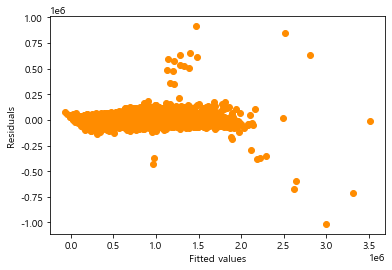

In [451]:
model_0 = smf.ols('em_g_jh~'+"+".join(A0.columns[3:]), data=A0).fit()
plt.scatter(model_0.fittedvalues, model_0.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [452]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A0.iloc[:,3:].values)

array([1.49574863, 0.43996437, 1.49522825, 1.04936736, 1.20023627,
       1.61536833, 1.96388974, 1.99434988, 1.49014173, 0.75808737,
       1.84311593, 0.36309784, 2.        , 2.058456  , 2.        ,
       1.97508263, 1.99492009, 1.99288884, 1.85440371, 1.91523272,
       1.35565223, 1.89488846, 2.        , 1.98988957, 1.95389017,
       2.        , 1.92537896, 1.96189553, 1.85756812, 1.8010155 ,
       1.79091629, 1.67153358, 1.98043044, 1.7711704 , 1.61537388,
       2.04015367, 1.80974698, 2.07533852, 1.7163458 , 1.87631342,
       1.8603621 , 1.57899025, 2.15398567, 1.89003702, 1.84626747,
       1.76531119, 0.86521323, 0.84750631, 1.02763152, 0.99633892,
       0.90877077, 1.76135779, 2.06721658, 2.13420299, 1.79746881,
       2.07520286])

In [453]:
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨
durbin_watson(model_0.resid)

1.9443994461996321

#### 이분산성 확인

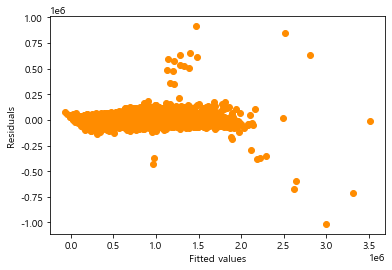

In [454]:
plt.scatter(model_0.fittedvalues, model_0.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

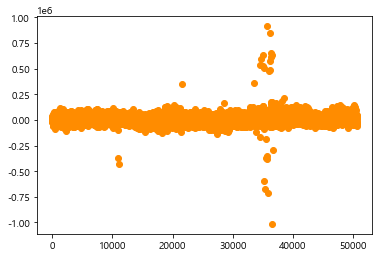

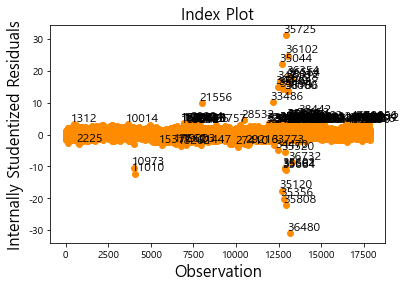

In [455]:
inf0 = OLSInfluence(model_0)
plt.scatter(A0.index, model_0.resid, color = 'darkorange')
inf0.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 그 수가 매우 많고, 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

#### 영향점 확인

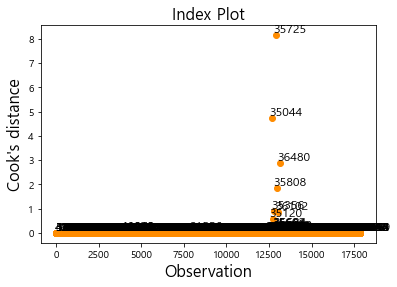

In [456]:
inf0.plot_index('cook',threshold=4/(model_0.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [457]:
A0.loc[[35725, 35044, 36480, 35808]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,pay_amt_sum_jh,pay_amt_mean_jh,pay_amt_std_jh,...,all_21_x_ss,resd_pop_cnt_남성_ss,resd_pop_cnt_y_0_ss,resd_pop_cnt_y_60_ss,resd_pop_cnt_y_80_ss,visit_pop_cnt_y_40_ss,all_1_y_ss,resd_pop_cnt_13_y_ss,visit_pop_cnt_13_y_ss,work_pop_cnt_13_y_ss
35725,2020-07-11,표선면,2387978,-0.119048,-0.400440,-0.555556,-0.53,16.264215,27.271457,142.019766,...,-0.009519,0.113040,-0.058686,0.374613,0.287193,0.116249,0.314332,0.516525,-0.047908,0.121670
35044,2020-06-24,표선면,3443542,-0.253968,-0.379538,-0.555556,-0.52,24.717029,40.274451,210.460916,...,-0.053389,0.125281,-0.038042,0.382428,0.289354,-0.307951,0.261309,0.600341,-0.030159,-0.043033
36480,2020-07-29,표선면,1983564,-0.253968,-0.247525,-0.277778,-0.32,8.160851,13.590818,70.350404,...,-0.031827,0.117457,-0.021202,0.347320,0.262870,-0.011257,0.350399,0.544689,0.094879,0.209785
35808,2020-07-13,표선면,2601546,-0.214286,-0.336634,-0.444444,-0.44,16.315789,28.260479,144.237197,...,-0.014802,0.131674,-0.041276,0.402186,0.296037,-0.099479,0.281410,0.660412,-0.200951,-0.002561


#### 다중공산성(VIF) 확인

In [458]:
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [459]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A0.columns[3:]), A0, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 50.500691623312036
VIF of em_g_min_jh : 218.21090695090126
VIF of em_cnt_sum_jh : 26.88834980886589
VIF of em_cnt_std_jh : 33.06537327207928
VIF of em_cnt_max_jh : 17.078294228383974
VIF of pay_amt_sum_jh : 96.2112497288165
VIF of pay_amt_mean_jh : 15391733.525866369
VIF of pay_amt_std_jh : 622.4383091703685
VIF of pay_amt_max_jh : 705.8497030711153
VIF of pay_amt_min_jh : 219.4232788780712
VIF of 한회평균배출량_jh : 9.273556948644389
VIF of 한회평균지불금액_jh : 64.59466416599348
VIF of use_cnt_max_jh : 5.6485000355829476
VIF of EGY_lf_resid_ks : 1.0870602248055004
VIF of ETC_lf_resid_ks : 9.934919277379944
VIF of FRA_lf_resid_ks : 4.138745959208818
VIF of IND_lf_resid_ks : 2.595502358293205
VIF of KAZ_lf_resid_ks : 1.3981280746842435
VIF of RUS_lf_resid_ks : 1.8352960204829856
VIF of THA_lf_resid_ks : 4.004275765267139
VIF of USA_lf_resid_ks : 38.600202000699674
VIF of UZB_lf_resid_ks : 1.8876721128373615
VIF of ETC_lf_work_ks : 4.240183919343917
VIF of FRA_lf_work_ks : 1.0655369

In [460]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of Intercept : 50.500691623312036 ----Drop
VIF of em_g_min_jh : 218.21090695090126 ----Drop
VIF of em_cnt_sum_jh : 26.88834980886589 ----Drop
VIF of em_cnt_std_jh : 33.06537327207928 ----Drop
VIF of em_cnt_max_jh : 17.078294228383974 ----Drop
VIF of pay_amt_sum_jh : 96.2112497288165 ----Drop
VIF of pay_amt_mean_jh : 15391733.525866369 ----Drop
VIF of pay_amt_std_jh : 622.4383091703685 ----Drop
VIF of pay_amt_max_jh : 705.8497030711153 ----Drop
VIF of pay_amt_min_jh : 219.4232788780712 ----Drop
VIF of 한회평균지불금액_jh : 64.59466416599348 ----Drop
VIF of USA_lf_resid_ks : 38.600202000699674 ----Drop
VIF of pay_amt_ks : 15391593.575315693 ----Drop
VIF of 장기근무표준편차_sy : 15.522013655642047 ----Drop
VIF of 슈퍼마켓_금액비율_sy : 14.235362331533873 ----Drop
VIF of all_21_x_ss : 51.9743254787014 ----Drop
VIF of resd_pop_cnt_남성_ss : 188.38233497639712 ----Drop
VIF of resd_pop_cnt_y_0_ss : 34.39355734201501 ----Drop
VIF of resd_pop_cnt_y_60_ss : 91.65541048576725 ----Drop
VIF of resd_pop_cnt_y_80_ss : 21.

In [461]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A0.drop(['pay_amt_mean_jh','pay_amt_max_jh','pay_amt_min_jh','resd_pop_cnt_남성_ss',
                                                   'pay_amt_std_jh','all_21_x_ss','resd_pop_cnt_13_y_ss','pay_amt_sum_jh',
                                                   'all_1_y_ss','work_pop_cnt_13_y_ss','resd_pop_cnt_y_60_ss','em_cnt_std_jh',
                                                   'resd_pop_cnt_y_0_ss','슈퍼마켓_금액비율_sy','USA_lf_resid_ks','visit_pop_cnt_y_40_ss'], axis=1).columns[3:]),
                                           A0.drop(['pay_amt_mean_jh','pay_amt_max_jh','pay_amt_min_jh','resd_pop_cnt_남성_ss',
                                                   'pay_amt_std_jh','all_21_x_ss','resd_pop_cnt_13_y_ss','pay_amt_sum_jh',
                                                   'all_1_y_ss','work_pop_cnt_13_y_ss','resd_pop_cnt_y_60_ss','em_cnt_std_jh',
                                                   'resd_pop_cnt_y_0_ss','슈퍼마켓_금액비율_sy','USA_lf_resid_ks','visit_pop_cnt_y_40_ss'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 14.673440177811147 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [462]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A0 = A0.drop(['pay_amt_mean_jh','pay_amt_max_jh','pay_amt_min_jh','resd_pop_cnt_남성_ss',
              'pay_amt_std_jh','all_21_x_ss','resd_pop_cnt_13_y_ss','pay_amt_sum_jh',
              'all_1_y_ss','work_pop_cnt_13_y_ss','resd_pop_cnt_y_60_ss','em_cnt_std_jh',
              'resd_pop_cnt_y_0_ss','슈퍼마켓_금액비율_sy','USA_lf_resid_ks','visit_pop_cnt_y_40_ss'], axis=1)
A0.shape

(17851, 43)

In [463]:
# 회귀계수로 각 피쳐의 중요도 확인
model0 = smf.ols('em_g_jh~'+"+".join(A0.columns[3:]), data=A0).fit()
model0.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.287e+06,2660.128,483.749,0.000,1.28e+06,1.29e+06
em_g_min_jh,-9841.3929,578.303,-17.018,0.000,-1.1e+04,-8707.863
em_cnt_sum_jh,2.396e+06,8941.752,267.907,0.000,2.38e+06,2.41e+06
em_cnt_max_jh,-2.581e+04,4422.330,-5.835,0.000,-3.45e+04,-1.71e+04
한회평균배출량_jh,2.589e+05,1866.804,138.712,0.000,2.55e+05,2.63e+05
한회평균지불금액_jh,-1.061e+04,520.945,-20.372,0.000,-1.16e+04,-9591.773
use_cnt_max_jh,-4.318e+05,1.23e+04,-35.050,0.000,-4.56e+05,-4.08e+05
EGY_lf_resid_ks,6559.7786,1908.845,3.437,0.001,2818.257,1.03e+04
ETC_lf_resid_ks,2.99e+04,1332.879,22.435,0.000,2.73e+04,3.25e+04
FRA_lf_resid_ks,-1995.8416,888.548,-2.246,0.025,-3737.481,-254.202


In [464]:
A0.to_csv('군집0_feature_corona.csv',index=False)

# A1

#### F검정

In [465]:
model1 = smf.ols('em_g_jh~'+"+".join(A1.columns[3:]), data=A1).fit()
model1.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,1.392e+06
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:14:55,Log-Likelihood:,-23018.
No. Observations:,2554,AIC:,4.706e+04
Df Residuals:,2042,BIC:,5.005e+04
Df Model:,511,,
Covariance Type:,nonrobust,,


#### T검정

In [466]:
A1 = pd.concat([A1.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A1[list(model1.params[model1.pvalues<0.05].index)[3:]]],axis=1)
A1.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(2554, 54)

#### 선형성 확인

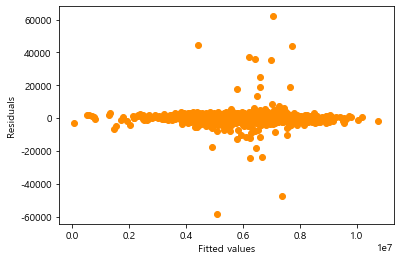

In [467]:
model_1 = smf.ols('em_g_jh~'+"+".join(A1.columns[3:]), data=A1).fit()
plt.scatter(model_1.fittedvalues, model_1.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [468]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A1.iloc[:,3:].values)

array([2.24211402e+00, 1.00126354e-01, 1.15148312e-01, 1.17842769e+00,
       1.40215867e+00, 2.22350777e+00, 5.38388198e-02, 6.29255720e-02,
       4.31770762e-01, 3.32299591e-01, 8.94803360e-01, 2.20541038e+00,
       2.55452023e+00, 2.00000000e+00, 1.09455389e+00, 1.88046908e+00,
       2.00000000e+00, 1.98593375e+00, 1.99865319e+00, 1.19666730e+00,
       2.00000000e+00, 1.92060375e+00, 2.64943040e+00, 1.66197954e+00,
       1.54757620e+00, 1.83948032e+00, 1.85686499e+00, 1.98096740e+00,
       2.87820372e-01, 6.82180822e-01, 6.52944517e-01, 1.01598952e+00,
       1.91185387e+00, 1.98714055e+00, 4.32848770e-01, 2.00000000e+00,
       2.00000000e+00, 2.67654416e-01, 1.41569682e+00, 9.87652496e-01,
       9.06834104e-01, 1.45732076e+00, 2.06878282e+00, 2.06986328e+00,
       1.93017094e+00, 2.14200149e+00, 2.25931773e+00, 2.12197366e+00,
       1.01894919e-03, 7.27057262e-05, 8.34047905e-05])

In [469]:
durbin_watson(model_1.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

1.9992731428199946

#### 이분산성 확인

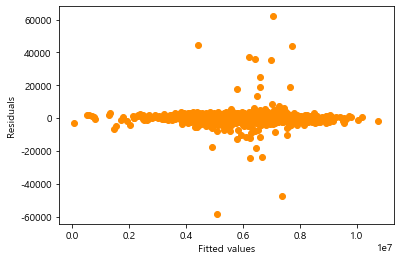

In [470]:
plt.scatter(model_1.fittedvalues, model_1.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

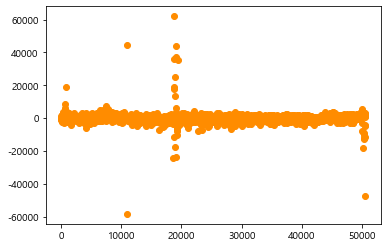

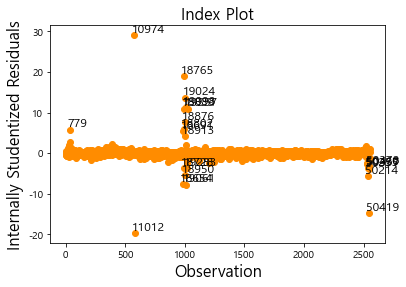

In [471]:
inf1 = OLSInfluence(model_1)
plt.scatter(A1.index, model_1.resid, color = 'darkorange')
inf1.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 그 수가 매우 많고, 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

In [472]:
A1.loc[[10974,18765,19024,11012,50419]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,pay_amt_sum_jh,pay_amt_std_jh,pay_amt_max_jh,pay_amt_min_jh,한회평균배출량_jh,...,work_pop_cnt_남성_ss,all_10_ss,all_11_y_ss,resd_pop_cnt_10_ss,visit_pop_cnt_3_y_ss,visit_pop_cnt_10_x_1_ss,work_pop_cnt_10_ss,코로나확진자합계_전국,count,isolClear
10974,2018-10-16,일도2동,4473850,1.714286,2.256326,3.408423,1.330638,2.336548,1.727273,-0.519720,...,0.574583,-0.075134,-0.194464,0.272188,-0.463313,-0.310717,-0.537437,0.000000,0.000000,0.000000
18765,2019-05-12,연동,7130200,-0.253968,3.302530,2.864265,0.157233,0.517385,-0.294118,-0.304705,...,1.950768,6.393031,6.366337,7.404276,6.024695,3.559661,9.737437,0.000000,0.000000,0.000000
19024,2019-05-19,연동,7777700,-0.103175,3.729373,3.211834,0.214735,0.379014,-0.294118,-0.329148,...,2.010698,6.587888,6.472395,7.391105,6.715299,4.304087,8.304653,0.000000,0.000000,0.000000
11012,2018-10-17,일도2동,5040000,2.142857,2.402640,2.850077,0.536388,0.341502,2.171123,-0.427739,...,0.615893,-0.181128,-0.214626,0.150834,-0.541939,-0.426775,-0.372799,0.000000,0.000000,0.000000
50419,2021-06-27,연동,7341800,0.071429,3.860286,3.219250,0.375562,0.676281,0.080214,-0.452085,...,1.353695,5.668541,5.293557,7.026468,5.962319,3.624042,2.428919,7.583305,26.680851,44.518519


#### 영향점 확인

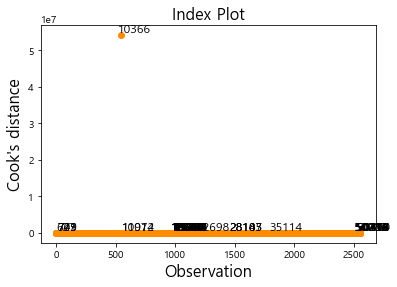

In [473]:
inf1.plot_index('cook',threshold=4/(model_1.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [474]:
A1.loc[[10974]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,pay_amt_sum_jh,pay_amt_std_jh,pay_amt_max_jh,pay_amt_min_jh,한회평균배출량_jh,...,work_pop_cnt_남성_ss,all_10_ss,all_11_y_ss,resd_pop_cnt_10_ss,visit_pop_cnt_3_y_ss,visit_pop_cnt_10_x_1_ss,work_pop_cnt_10_ss,코로나확진자합계_전국,count,isolClear
10974,2018-10-16,일도2동,4473850,1.714286,2.256326,3.408423,1.330638,2.336548,1.727273,-0.51972,...,0.574583,-0.075134,-0.194464,0.272188,-0.463313,-0.310717,-0.537437,0.0,0.0,0.0


#### 다중공산성(VIF) 확인

In [475]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A1.columns[3:]), A1, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 31227606.483439196
VIF of em_g_min_jh : 2971.6928503445592
VIF of em_cnt_sum_jh : 257.57332191643803
VIF of pay_amt_sum_jh : 199.93888005659514
VIF of pay_amt_std_jh : 13.240118025883795
VIF of pay_amt_max_jh : 7.507817491976229
VIF of pay_amt_min_jh : 2979.530503387241
VIF of 한회평균배출량_jh : 56.03314417851
VIF of 한회평균지불금액_jh : 105.75872223311352
VIF of use_amt_std_jh : 15699.68127408436
VIF of ko_resid_ks : 52.044019749886665
VIF of ko_female_visit_ks : 38.7581381629942
VIF of lf_work_ks : 78.35031923824761
VIF of lf_visit_ks : 75.56333272667938
VIF of AUS_lf_resid_ks : 2.1954023134495446
VIF of CAN_lf_resid_ks : 2.5783931896044585
VIF of DEU_lf_resid_ks : 3.3154935133452748
VIF of FRA_lf_resid_ks : 3.849734224375355
VIF of IND_lf_resid_ks : 3.5640290912346546
VIF of KGZ_lf_resid_ks : 4.323891037801324
VIF of UZB_lf_resid_ks : 2.372905030164394
VIF of MMR_lf_work_ks : 1.4105280399731506
VIF of PHL_lf_work_ks : 1.2769016097713561
VIF of ETC_lf_visit_ks : 3.8791569028522

In [476]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of Intercept : 31227606.483439196 ----Drop
VIF of em_g_min_jh : 2971.6928503445592 ----Drop
VIF of em_cnt_sum_jh : 257.57332191643803 ----Drop
VIF of pay_amt_sum_jh : 199.93888005659514 ----Drop
VIF of pay_amt_std_jh : 13.240118025883795 ----Drop
VIF of pay_amt_min_jh : 2979.530503387241 ----Drop
VIF of 한회평균배출량_jh : 56.03314417851 ----Drop
VIF of 한회평균지불금액_jh : 105.75872223311352 ----Drop
VIF of use_amt_std_jh : 15699.68127408436 ----Drop
VIF of ko_resid_ks : 52.044019749886665 ----Drop
VIF of ko_female_visit_ks : 38.7581381629942 ----Drop
VIF of lf_work_ks : 78.35031923824761 ----Drop
VIF of lf_visit_ks : 75.56333272667938 ----Drop
VIF of em_cnt_ks : 241.2627412250313 ----Drop
VIF of pay_amt_ks : 216.00706092933171 ----Drop
VIF of 방문최대_sy : 30.764047144964845 ----Drop
VIF of 방문분산_sy : 42.47881861776489 ----Drop
VIF of 장기거주분산_sy : 106.20209413785281 ----Drop
VIF of 건수표준편차_sy : 15684.891262173342 ----Drop
VIF of 한국나이분산_sy : 49.53128920094302 ----Drop
VIF of 한국여성인구합계_sy : 49.509302500

In [303]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A1.drop(['all_10_ss','use_amt_std_jh','em_g_min_jh','all_11_y_ss','work_pop_cnt_22_x_ss',
                                                   'work_pop_cnt_남성_ss','em_cnt_sum_jh','count','resd_pop_cnt_10_ss','em_cnt_ks',
                                                   'lf_work_ks','코로나확진자합계_전국','한회평균지불금액_jh','visit_pop_cnt_10_x_1_ss',
                                                   '한국여성인구합계_sy','work_pop_cnt_23_x_ss','방문분산_sy','장기거주분산_sy',
                                                   'ko_female_visit_ks','ko_resid_ks','pay_amt_ks','방문최대_sy','work_pop_cnt_10_ss'], axis=1).columns[3:]), 
                                           A1.drop(['all_10_ss','use_amt_std_jh','em_g_min_jh','all_11_y_ss','work_pop_cnt_22_x_ss',
                                                   'work_pop_cnt_남성_ss','em_cnt_sum_jh','count','resd_pop_cnt_10_ss','em_cnt_ks',
                                                   'lf_work_ks','코로나확진자합계_전국','한회평균지불금액_jh','visit_pop_cnt_10_x_1_ss',
                                                   '한국여성인구합계_sy','work_pop_cnt_23_x_ss','방문분산_sy','장기거주분산_sy',
                                                   'ko_female_visit_ks','ko_resid_ks','pay_amt_ks','방문최대_sy','work_pop_cnt_10_ss'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 81.471956311642 ----Drop
pass
pass
pass
pass
pass
VIF of lf_visit_ks : 38.54396593747325 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
VIF of visit_pop_cnt_3_y_ss : 34.73738329187436 ----Drop
pass


In [304]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A1 = A1.drop(['all_10_ss','use_amt_std_jh','em_g_min_jh','all_11_y_ss','work_pop_cnt_22_x_ss',
              'work_pop_cnt_남성_ss','em_cnt_sum_jh','count','resd_pop_cnt_10_ss','em_cnt_ks',
              'lf_work_ks','코로나확진자합계_전국','한회평균지불금액_jh','visit_pop_cnt_10_x_1_ss',
              '한국여성인구합계_sy','work_pop_cnt_23_x_ss','방문분산_sy','장기거주분산_sy',
              'ko_female_visit_ks','ko_resid_ks','pay_amt_ks','방문최대_sy','work_pop_cnt_10_ss'], axis=1)
A1.shape

(2554, 31)

In [155]:
# 회귀계수로 각 피쳐의 중요도 확인
model1 = smf.ols('em_g_jh~'+"+".join(A1.columns[3:]), data=A1).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.414e+06,1.38e+04,102.126,0.000,1.39e+06,1.44e+06
pay_amt_sum_jh,1.892e+06,5318.269,355.753,0.000,1.88e+06,1.9e+06
pay_amt_std_jh,-1.582e+05,2.17e+04,-7.275,0.000,-2.01e+05,-1.16e+05
pay_amt_max_jh,2.562e+04,1.15e+04,2.223,0.026,3018.130,4.82e+04
pay_amt_min_jh,2545.4773,3014.191,0.844,0.398,-3365.060,8456.015
한회평균배출량_jh,4.425e+04,1.17e+04,3.796,0.000,2.14e+04,6.71e+04
lf_visit_ks,1792.4276,3296.238,0.544,0.587,-4671.176,8256.032
AUS_lf_resid_ks,1.133e+04,3736.442,3.033,0.002,4006.392,1.87e+04
CAN_lf_resid_ks,-1897.2341,2358.122,-0.805,0.421,-6521.284,2726.816
DEU_lf_resid_ks,255.1248,1319.366,0.193,0.847,-2332.025,2842.275


In [211]:
A1.to_csv('군집1_feature_corona.csv',index=False)

# A2

#### F검정

In [477]:
model2 = smf.ols('em_g_jh~'+"+".join(A2.columns[3:]), data=A2).fit()
model2.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,2.551e+05
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:17:06,Log-Likelihood:,-63249.
No. Observations:,6384,AIC:,1.275e+05
Df Residuals:,5866,BIC:,1.310e+05
Df Model:,517,,
Covariance Type:,nonrobust,,


#### T검정

In [479]:
A2 = pd.concat([A2.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A2[list(model2.params[model2.pvalues<0.05].index)[3:]]],axis=1)
A2.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(6384, 121)

#### 선형성 확인

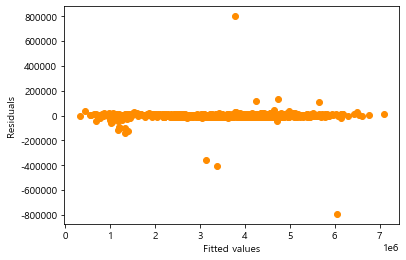

In [480]:
model_2 = smf.ols('em_g_jh~'+"+".join(A2.columns[3:]), data=A2).fit()
plt.scatter(model_2.fittedvalues, model_2.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [481]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A2.iloc[:,3:].values)

array([0.38368076, 2.26829694, 0.13759629, 0.27201098, 1.81205587,
       0.17475611, 1.45246302, 1.370302  , 2.26782208, 0.41007985,
       0.60298786, 0.5266694 , 0.19316599, 0.22005781, 1.2587923 ,
       2.0687656 , 1.96212487, 1.97209553, 1.63753137, 1.97501878,
       2.0846605 , 1.07601923, 2.        , 1.75105078, 1.64652424,
       1.36254393, 1.97432619, 1.72709921, 1.80828376, 2.        ,
       1.99990885, 1.96204659, 1.94469269, 1.94949236, 1.86765698,
       2.        , 1.57475459, 1.49361325, 1.86217976, 1.6629983 ,
       1.54317214, 1.22887022, 1.03507022, 1.38936804, 1.78710535,
       0.39266578, 1.05149592, 0.13451209, 0.16867731, 1.15778576,
       0.45610691, 0.35674413, 0.63295767, 0.71848183, 0.27511789,
       0.34081448, 0.474595  , 1.10756677, 0.46522402, 0.17661781,
       1.60030779, 0.55669236, 0.46127026, 0.76281687, 0.80996011,
       0.34803626, 0.30857507, 1.62806509, 1.74306427, 2.66294372,
       0.84959333, 1.76059674, 1.8924124 , 1.82118626, 0.46522

In [482]:
durbin_watson(model_2.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

1.9820684372856017

#### 이분산성 확인

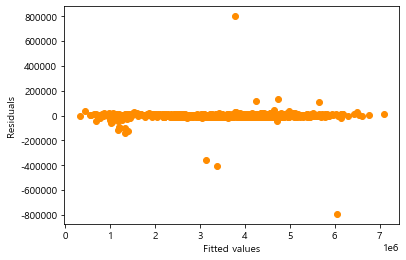

In [483]:
plt.scatter(model_2.fittedvalues, model_2.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

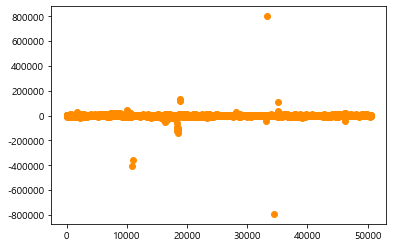

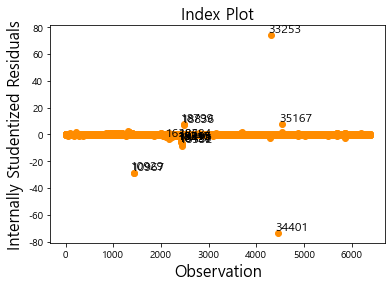

In [484]:
inf2 = OLSInfluence(model_2)
plt.scatter(A2.index, model_2.resid, color = 'darkorange')
inf2.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

In [485]:
A2.loc[[33253, 34401]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_max_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_min_jh,pay_amt_sum_jh,pay_amt_std_jh,...,use_cnt_간식_ss,use_cnt_농축수산물_ss,use_cnt_마트슈퍼마켓_ss,use_cnt_배달_ss,use_cnt_식품_ss,use_cnt_아시아음식_ss,use_cnt_양식_ss,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss
33253,2020-05-12,동홍동,4587464,4.177179,-0.246032,1.212321,1.000000,0.000000,9.551754,60.768194,...,0.603113,0.913580,1.219075,1.195312,0.366242,0.745283,0.200000,0.00,0.512438,0.655721
34401,2020-06-09,동홍동,5266264,4.267442,0.126984,1.512651,1.555556,0.333333,9.911200,60.796945,...,0.645914,0.592593,1.222852,1.320312,0.500000,0.745283,0.290909,0.25,0.462687,0.535323


#### 영향점 확인

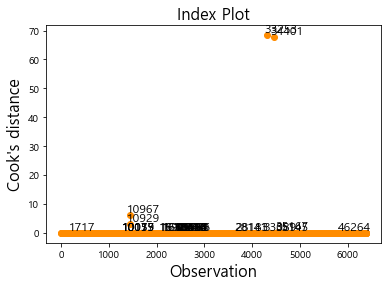

In [486]:
inf2.plot_index('cook',threshold=4/(model_2.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [487]:
A.loc[[33253,34401]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_mean_jh,em_g_std_jh,em_g_max_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_mean_jh,em_cnt_std_jh,...,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss,코로나확진자합계_전국,count,death,isolClear,localOcc,overFlow,qurR
33253,2020-05-12,동홍동,4587464,1.516044,2.859545,4.177179,-0.246032,1.212321,0.888889,1.000000,...,0.00,0.512438,0.655721,0.534794,0.297872,0.0,0.444444,0.0,0.0,0.304665
34401,2020-06-09,동홍동,5266264,1.965883,3.137542,4.267442,0.126984,1.512651,1.222222,1.555556,...,0.25,0.462687,0.535323,0.579588,0.319149,0.0,0.481481,0.0,0.0,0.326531


#### 다중공산성(VIF) 확인

In [488]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A2.columns[3:]), A2, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 0.0
VIF of em_g_max_jh : 18.741634098107735
VIF of em_g_min_jh : 91.53309306716159
VIF of em_cnt_sum_jh : 69.97136965305906
VIF of em_cnt_std_jh : 28.268079870494265
VIF of em_cnt_min_jh : 2.48942278949851
VIF of pay_amt_sum_jh : 104.70321668589057
VIF of pay_amt_std_jh : 218.42096648501104
VIF of pay_amt_max_jh : 227.09294070451415
VIF of pay_amt_min_jh : 90.28669413647735
VIF of 한회평균배출량_jh : 90.14324864592353
VIF of 한회평균지불금액_jh : 132.6026992630297
VIF of 배출거점지역종류_jh : 83.67460445549868
VIF of use_cnt_sum_jh : inf
VIF of use_amt_sum_jh : inf
VIF of 한회평균결제금액_jh : 35.03829901037268
VIF of lf_resid_ks : 46.43410287380817
VIF of AUS_lf_resid_ks : 7.876431216950431
VIF of CAN_lf_resid_ks : 4.269868620697674
VIF of ETC_lf_resid_ks : 3.5980482909553118
VIF of GBR_lf_resid_ks : 5.048267977539647
VIF of IDN_lf_resid_ks : 3.085250719847667
VIF of JPN_lf_resid_ks : 4.275538840791754
VIF of KAZ_lf_resid_ks : 1.4008772872205801
VIF of KHM_lf_resid_ks : 2.1285679374349082
VIF of 

In [489]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of em_g_max_jh : 18.741634098107735 ----Drop
VIF of em_g_min_jh : 91.53309306716159 ----Drop
VIF of em_cnt_sum_jh : 69.97136965305906 ----Drop
VIF of em_cnt_std_jh : 28.268079870494265 ----Drop
VIF of pay_amt_sum_jh : 104.70321668589057 ----Drop
VIF of pay_amt_std_jh : 218.42096648501104 ----Drop
VIF of pay_amt_max_jh : 227.09294070451415 ----Drop
VIF of pay_amt_min_jh : 90.28669413647735 ----Drop
VIF of 한회평균배출량_jh : 90.14324864592353 ----Drop
VIF of 한회평균지불금액_jh : 132.6026992630297 ----Drop
VIF of 배출거점지역종류_jh : 83.67460445549868 ----Drop
VIF of use_cnt_sum_jh : inf ----Drop
VIF of use_amt_sum_jh : inf ----Drop
VIF of 한회평균결제금액_jh : 35.03829901037268 ----Drop
VIF of lf_resid_ks : 46.43410287380817 ----Drop
VIF of 간식_cnt_ks : inf ----Drop
VIF of 농축수산물_cnt_ks : inf ----Drop
VIF of 슈퍼마켓_cnt_ks : inf ----Drop
VIF of 배달_cnt_ks : inf ----Drop
VIF of 부페_cnt_ks : inf ----Drop
VIF of 식품_cnt_ks : inf ----Drop
VIF of 아시아음식_cnt_ks : inf ----Drop
VIF of 양식_cnt_ks : inf ----Drop
VIF of 주점및주류판매_cnt

In [491]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A2.drop(['use_cnt_sum_jh','use_amt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
                                                   '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
                                                   '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
                                                   '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks',
                                                   '아시아음식_amt_ks','양식_amt_ks','주점및주류판매_amt_ks','패스트푸드_amt_ks',
                                                   '한식_amt_ks','all_24_x_ss','all_10_ss','all_18_y_ss','all_21_x_ss',
                                                   'pay_amt_max_jh','resd_pop_cnt_10_ss','resd_pop_cnt_24_x_ss','거주합계_diff_sy',
                                                   'use_cnt_배달_ss','한회평균지불금액_jh','visit_pop_cnt_남성_ss',
                                                   'resd_pop_cnt_18_y_ss','pay_amt_sum_jh','em_g_min_jh','use_cnt_한식_ss',
                                                   '배출거점지역종류_jh','work_pop_cnt_19_x_ss','work_pop_cnt_제주_y_ss',
                                                   '식품_금액비율_sy','visit_pop_cnt_21_x_ss','lf_resid_ks','슈퍼마켓_sy',
                                                   '식품_sy','resd_pop_cnt_21_x_ss','work_pop_cnt_24_x_ss','em_cnt_std_jh',
                                                   'use_cnt_간식_ss','work_pop_cnt_10_ss',
                                                'work_pop_cnt_18_y_ss','pay_amt_ks'], axis=1).columns[3:]), 
                                           A2.drop(['use_cnt_sum_jh','use_amt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
                                                   '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
                                                   '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
                                                   '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks',
                                                   '아시아음식_amt_ks','양식_amt_ks','주점및주류판매_amt_ks','패스트푸드_amt_ks',
                                                   '한식_amt_ks','all_24_x_ss','all_10_ss','all_18_y_ss','all_21_x_ss',
                                                   'pay_amt_max_jh','resd_pop_cnt_10_ss','resd_pop_cnt_24_x_ss','거주합계_diff_sy',
                                                   'use_cnt_배달_ss','한회평균지불금액_jh','visit_pop_cnt_남성_ss',
                                                   'resd_pop_cnt_18_y_ss','pay_amt_sum_jh','em_g_min_jh','use_cnt_한식_ss',
                                                   '배출거점지역종류_jh','work_pop_cnt_19_x_ss','work_pop_cnt_제주_y_ss',
                                                   '식품_금액비율_sy','visit_pop_cnt_21_x_ss','lf_resid_ks','슈퍼마켓_sy',
                                                   '식품_sy','resd_pop_cnt_21_x_ss','work_pop_cnt_24_x_ss','em_cnt_std_jh',
                                                   'use_cnt_간식_ss','work_pop_cnt_10_ss',
                                                   'work_pop_cnt_18_y_ss','pay_amt_ks'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 58.37950439320666 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
VIF of visit_pop_cnt_제주_x_ss : 10.19302964486755 ----Drop
pass
VIF of visit_pop_cnt_10_x_1_ss : 11.09693540208764 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [492]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A2 = A2.drop(['use_cnt_sum_jh','use_amt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
              '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
              '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
              '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks',
              '아시아음식_amt_ks','양식_amt_ks','주점및주류판매_amt_ks','패스트푸드_amt_ks',
              '한식_amt_ks','all_24_x_ss','all_10_ss','all_18_y_ss','all_21_x_ss',
              'pay_amt_max_jh','resd_pop_cnt_10_ss','resd_pop_cnt_24_x_ss','거주합계_diff_sy',
              'use_cnt_배달_ss','한회평균지불금액_jh','visit_pop_cnt_남성_ss',
              'resd_pop_cnt_18_y_ss','pay_amt_sum_jh','em_g_min_jh','use_cnt_한식_ss',
              '배출거점지역종류_jh','work_pop_cnt_19_x_ss','work_pop_cnt_제주_y_ss',
              '식품_금액비율_sy','visit_pop_cnt_21_x_ss','lf_resid_ks','슈퍼마켓_sy',
              '식품_sy','resd_pop_cnt_21_x_ss','work_pop_cnt_24_x_ss','em_cnt_std_jh',
              'use_cnt_간식_ss','work_pop_cnt_10_ss',
              'work_pop_cnt_18_y_ss','pay_amt_ks'], axis=1)
A2.shape

(6384, 69)

In [493]:
# 회귀계수로 각 피쳐의 중요도 확인
model2 = smf.ols('em_g_jh~'+"+".join(A2.columns[3:]), data=A2).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.663e+06,1.17e+04,142.703,0.000,1.64e+06,1.69e+06
em_g_max_jh,9697.4136,4858.754,1.996,0.046,172.605,1.92e+04
em_cnt_sum_jh,1.922e+06,6424.470,299.098,0.000,1.91e+06,1.93e+06
em_cnt_min_jh,2.677e+04,9604.281,2.787,0.005,7938.980,4.56e+04
pay_amt_std_jh,3808.8969,1488.186,2.559,0.011,891.546,6726.247
pay_amt_min_jh,2.038e+04,8256.403,2.468,0.014,4191.470,3.66e+04
한회평균배출량_jh,1.914e+06,1.47e+04,130.396,0.000,1.88e+06,1.94e+06
한회평균결제금액_jh,2.208e+04,4988.644,4.426,0.000,1.23e+04,3.19e+04
AUS_lf_resid_ks,9570.4215,1553.555,6.160,0.000,6524.926,1.26e+04
CAN_lf_resid_ks,-1.845e+04,2727.709,-6.764,0.000,-2.38e+04,-1.31e+04


In [ ]:
A2.to_csv('군집21_feature_corona.csv',index=False)

# A3

#### F검정

In [494]:
model3 = smf.ols('em_g_jh~'+"+".join(A3.columns[3:]), data=A3).fit()
model3.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,1.473e+05
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:19:09,Log-Likelihood:,-1.5923e+05
No. Observations:,15316,AIC:,3.195e+05
Df Residuals:,14794,BIC:,3.235e+05
Df Model:,521,,
Covariance Type:,nonrobust,,


#### T검정

In [495]:
A3 = pd.concat([A3.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A3[list(model3.params[model3.pvalues<0.05].index)[3:]]],axis=1)
A3.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(15316, 116)

#### 선형성 확인

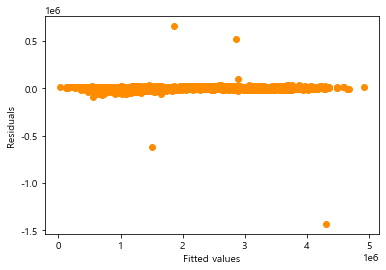

In [496]:
model_3 = smf.ols('em_g_jh~'+"+".join(A3.columns[3:]), data=A3).fit()
plt.scatter(model_3.fittedvalues, model_3.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [497]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A3.iloc[:,3:].values)

array([1.95938576e+00, 1.13382086e+00, 1.67375845e+00, 1.36620880e+00,
       1.91314981e+00, 1.45437083e+00, 1.87167783e+00, 1.77142868e+00,
       1.95794598e+00, 2.07281734e+00, 2.08300541e+00, 1.97378622e+00,
       1.90219657e+00, 1.65481536e+00, 1.70791749e+00, 1.62217638e+00,
       2.36137509e+00, 1.81090883e+00, 1.79136861e+00, 2.36597630e+00,
       1.66987767e+00, 2.00000000e+00, 1.67385626e+00, 1.88802180e+00,
       1.92005167e+00, 1.81950593e+00, 1.77584228e+00, 2.00000000e+00,
       1.57598295e+00, 1.89490605e+00, 1.46654742e+00, 1.69768130e+00,
       2.00000000e+00, 2.00000000e+00, 1.96911648e+00, 1.49897804e+00,
       2.11370698e+00, 1.98196352e+00, 1.75193876e+00, 1.73706507e+00,
       2.00000000e+00, 1.65126414e+00, 2.00000000e+00, 1.64483134e+00,
       2.00000000e+00, 1.70730409e+00, 1.77922260e+00, 1.73285698e+00,
       1.74374410e+00, 2.00000000e+00, 2.00000000e+00, 1.62283295e+00,
       1.99179280e+00, 1.27109755e+00, 1.92574205e+00, 1.95290136e+00,
      

In [498]:
durbin_watson(model_3.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

1.9983925003718075

#### 이분산성 확인

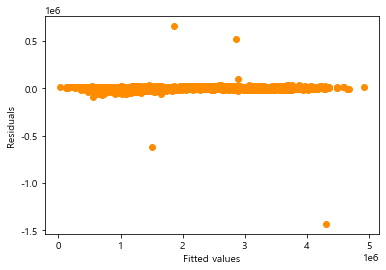

In [499]:
plt.scatter(model_3.fittedvalues, model_3.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

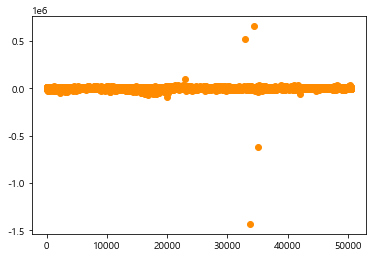

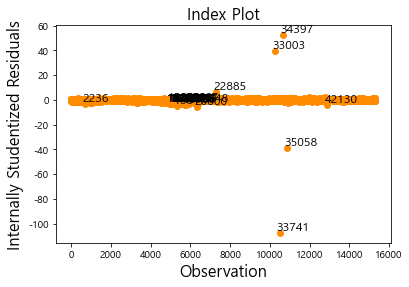

In [500]:
inf3 = OLSInfluence(model_3)
plt.scatter(A3.index, model_3.resid, color = 'darkorange')
inf3.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

In [501]:
A3.loc[[34397,33003,35058,33741]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,em_cnt_min_jh,pay_amt_sum_jh,pay_amt_std_jh,...,work_pop_cnt_1_y_ss,work_pop_cnt_3_y_ss,work_pop_cnt_6_y_ss,work_pop_cnt_13_y_ss,work_pop_cnt_14_y_ss,work_pop_cnt_23_y_ss,work_pop_cnt_그외_y_ss,코로나확진자합계_전국,count,death
34397,2020-06-09,대륜동,2516964,0.595238,0.276128,0.555556,0.49,1.000000,8.437552,75.995508,...,-0.272904,-0.249628,-0.247397,-0.218750,-0.016301,-0.002093,0.069823,0.579588,0.319149,0.0
33003,2020-05-06,대륜동,3382428,-0.158730,0.287129,0.666667,0.45,0.000000,8.466787,74.995508,...,0.068347,0.100744,0.102628,-0.085297,-0.087774,0.025115,0.739828,0.528437,0.276596,0.0
35058,2020-06-25,삼도1동,884055,0.007937,-0.427943,-0.611111,-0.56,0.000000,-0.407402,-0.486074,...,-0.070771,-0.280397,-0.278136,-0.529201,-0.522382,-0.166597,-0.160897,0.614358,0.404255,0.0
33741,2020-05-24,대륜동,2878164,1.007937,0.432343,1.000000,0.78,1.333333,8.623643,76.448338,...,-0.507998,-0.490323,-0.487853,-0.317623,-0.025831,0.297614,0.136650,0.547215,0.297872,0.0


#### 영향점 확인

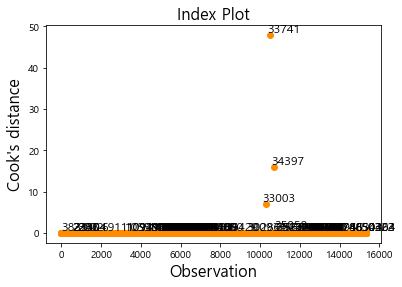

In [502]:
inf3.plot_index('cook',threshold=4/(model_3.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [503]:
A3.loc[[33741,34397,33003]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,em_cnt_min_jh,pay_amt_sum_jh,pay_amt_std_jh,...,work_pop_cnt_1_y_ss,work_pop_cnt_3_y_ss,work_pop_cnt_6_y_ss,work_pop_cnt_13_y_ss,work_pop_cnt_14_y_ss,work_pop_cnt_23_y_ss,work_pop_cnt_그외_y_ss,코로나확진자합계_전국,count,death
33741,2020-05-24,대륜동,2878164,1.007937,0.432343,1.000000,0.78,1.333333,8.623643,76.448338,...,-0.507998,-0.490323,-0.487853,-0.317623,-0.025831,0.297614,0.136650,0.547215,0.297872,0.0
34397,2020-06-09,대륜동,2516964,0.595238,0.276128,0.555556,0.49,1.000000,8.437552,75.995508,...,-0.272904,-0.249628,-0.247397,-0.218750,-0.016301,-0.002093,0.069823,0.579588,0.319149,0.0
33003,2020-05-06,대륜동,3382428,-0.158730,0.287129,0.666667,0.45,0.000000,8.466787,74.995508,...,0.068347,0.100744,0.102628,-0.085297,-0.087774,0.025115,0.739828,0.528437,0.276596,0.0


#### 다중공산성(VIF) 확인

In [504]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A3.columns[3:]), A3, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 831.4322121625013
VIF of em_g_min_jh : 5928.286699758688
VIF of em_cnt_sum_jh : 35.219600818731955
VIF of em_cnt_std_jh : 77.47818535522285
VIF of em_cnt_max_jh : 31.969374721982906
VIF of em_cnt_min_jh : 26.18315216063179
VIF of pay_amt_sum_jh : 28.43604150169209
VIF of pay_amt_std_jh : 198.23542599086826
VIF of pay_amt_max_jh : 91.42041270793428
VIF of pay_amt_min_jh : 5937.550773659814
VIF of 한회평균배출량_jh : 125.68423289087588
VIF of 한회평균지불금액_jh : 156.54142777359723
VIF of 배출거점지역종류_jh : 17.052440561361692
VIF of 업종코드종류_jh : 1.3717510542219975
VIF of ko_resid_ks : 16626698.566247817
VIF of ko_male_resid_ks : 4470114.835285901
VIF of ko_female_resid_ks : 3908308.854928168
VIF of lf_resid_ks : 53.297150271785945
VIF of lf_visit_ks : 20.412333043487195
VIF of CAN_lf_resid_ks : 5.27908182943568
VIF of CHN_lf_resid_ks : 31.17725423894064
VIF of DEU_lf_resid_ks : 1.7858287554742331
VIF of EGY_lf_resid_ks : 1.3542291608631671
VIF of ETC_lf_resid_ks : 5.664441459602488
VIF of

In [505]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of Intercept : 831.4322121625013 ----Drop
VIF of em_g_min_jh : 5928.286699758688 ----Drop
VIF of em_cnt_sum_jh : 35.219600818731955 ----Drop
VIF of em_cnt_std_jh : 77.47818535522285 ----Drop
VIF of em_cnt_max_jh : 31.969374721982906 ----Drop
VIF of em_cnt_min_jh : 26.18315216063179 ----Drop
VIF of pay_amt_sum_jh : 28.43604150169209 ----Drop
VIF of pay_amt_std_jh : 198.23542599086826 ----Drop
VIF of pay_amt_max_jh : 91.42041270793428 ----Drop
VIF of pay_amt_min_jh : 5937.550773659814 ----Drop
VIF of 한회평균배출량_jh : 125.68423289087588 ----Drop
VIF of 한회평균지불금액_jh : 156.54142777359723 ----Drop
VIF of 배출거점지역종류_jh : 17.052440561361692 ----Drop
VIF of ko_resid_ks : 16626698.566247817 ----Drop
VIF of ko_male_resid_ks : 4470114.835285901 ----Drop
VIF of ko_female_resid_ks : 3908308.854928168 ----Drop
VIF of lf_resid_ks : 53.297150271785945 ----Drop
VIF of lf_visit_ks : 20.412333043487195 ----Drop
VIF of CHN_lf_resid_ks : 31.17725423894064 ----Drop
VIF of sf_visit_ks : 60.69881448495243 ----Dro

In [506]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A3.drop(['ko_resid_ks','pay_amt_min_jh','all_3_y_ss','all_13_x_ss','거주표준편차_sy',
                                                   'resd_pop_cnt_18_x_ss','all_24_x_ss','pay_amt_ks','단기방문표준편차_sy',
                                                   'ko_female_resid_ks','거주합계_diff_sy','한회평균지불금액_jh','근무표준편차_sy',
                                                   '한국나이분산_sy','resd_pop_cnt_6_x_ss','장기거주표준편차_sy','resd_pop_cnt_2_y_ss',
                                                   'ko_male_resid_ks','em_cnt_ks','코로나확진자합계_전국','pay_amt_std_jh',
                                                   'all_14_y_ss','lf_resid_ks','장기방문표준편차_sy','단기방문최대_sy','em_cnt_sum_jh',
                                                   '장기거주분산_sy','work_pop_cnt_3_y_ss','visit_pop_cnt_13_x_ss','visit_pop_cnt_8_x_ss',
                                                   'em_cnt_max_jh','em_g_min_jh','방문합계_diff_sy','work_pop_cnt_14_y_ss',
                                                   'work_pop_cnt_13_x_ss','거주최대_sy'], axis=1).columns[3:]), 
                                           A3.drop(['ko_resid_ks','pay_amt_min_jh','all_3_y_ss','all_13_x_ss','거주표준편차_sy',
                                                   'resd_pop_cnt_18_x_ss','all_24_x_ss','pay_amt_ks','단기방문표준편차_sy',
                                                   'ko_female_resid_ks','거주합계_diff_sy','한회평균지불금액_jh','근무표준편차_sy',
                                                   '한국나이분산_sy','resd_pop_cnt_6_x_ss','장기거주표준편차_sy','resd_pop_cnt_2_y_ss',
                                                   'ko_male_resid_ks','em_cnt_ks','코로나확진자합계_전국','pay_amt_std_jh',
                                                   'all_14_y_ss','lf_resid_ks','장기방문표준편차_sy','단기방문최대_sy','em_cnt_sum_jh',
                                                   '장기거주분산_sy','work_pop_cnt_3_y_ss','visit_pop_cnt_13_x_ss','visit_pop_cnt_8_x_ss',
                                                   'em_cnt_max_jh','em_g_min_jh','방문합계_diff_sy','work_pop_cnt_14_y_ss',
                                                   'work_pop_cnt_13_x_ss','거주최대_sy'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 11.29586154893382 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [507]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A3 = A3.drop(['ko_resid_ks','pay_amt_min_jh','all_3_y_ss','all_13_x_ss','거주표준편차_sy',
              'resd_pop_cnt_18_x_ss','all_24_x_ss','pay_amt_ks','단기방문표준편차_sy',
              'ko_female_resid_ks','거주합계_diff_sy','한회평균지불금액_jh','근무표준편차_sy',
              '한국나이분산_sy','resd_pop_cnt_6_x_ss','장기거주표준편차_sy','resd_pop_cnt_2_y_ss',
              'ko_male_resid_ks','em_cnt_ks','코로나확진자합계_전국','pay_amt_std_jh',
              'all_14_y_ss','lf_resid_ks','장기방문표준편차_sy','단기방문최대_sy','em_cnt_sum_jh',
              '장기거주분산_sy','work_pop_cnt_3_y_ss','visit_pop_cnt_13_x_ss','visit_pop_cnt_8_x_ss',
              'em_cnt_max_jh','em_g_min_jh','방문합계_diff_sy','work_pop_cnt_14_y_ss',
              'work_pop_cnt_13_x_ss','거주최대_sy'], axis=1)
A3.shape

(15316, 80)

In [508]:
# 회귀계수로 각 피쳐의 중요도 확인
model3 = smf.ols('em_g_jh~'+"+".join(A3.columns[3:]), data=A3).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.504e+06,1983.717,757.939,0.000,1.5e+06,1.51e+06
em_cnt_std_jh,4.696e+04,809.876,57.990,0.000,4.54e+04,4.86e+04
em_cnt_min_jh,2.011e+04,299.303,67.200,0.000,1.95e+04,2.07e+04
pay_amt_sum_jh,1.94e+06,3964.605,489.450,0.000,1.93e+06,1.95e+06
pay_amt_max_jh,-1.667e+05,664.283,-250.977,0.000,-1.68e+05,-1.65e+05
한회평균배출량_jh,1.386e+05,1997.535,69.401,0.000,1.35e+05,1.43e+05
배출거점지역종류_jh,-4.792e+04,4521.119,-10.599,0.000,-5.68e+04,-3.91e+04
업종코드종류_jh,-5358.3507,1071.492,-5.001,0.000,-7458.603,-3258.098
lf_visit_ks,-6879.4638,1935.160,-3.555,0.000,-1.07e+04,-3086.318
CAN_lf_resid_ks,-2157.6154,851.779,-2.533,0.011,-3827.204,-488.026


In [509]:
# 상수항을 없애야함
A3.to_csv('군집3_feature_corona.csv', index=False)

# A4

#### F검정

In [510]:
model4 = smf.ols('em_g_jh~'+"+".join(A4.columns[3:]), data=A4).fit()
model4.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,1.082e+05
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:20:05,Log-Likelihood:,-25999.
No. Observations:,2549,AIC:,5.303e+04
Df Residuals:,2033,BIC:,5.605e+04
Df Model:,515,,
Covariance Type:,nonrobust,,


#### T검정

In [511]:
A4 = pd.concat([A4.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A4[list(model4.params[model4.pvalues<0.05].index)[3:]]],axis=1)
A4.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(2549, 36)

#### 선형성 확인

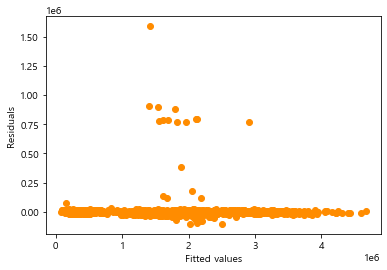

In [512]:
model_4 = smf.ols('em_g_jh~'+"+".join(A4.columns[3:]), data=A4).fit()
plt.scatter(model_4.fittedvalues, model_4.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [513]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A4.iloc[:,3:].values)

array([1.78456681, 1.34051771, 2.88281698, 3.41565405, 1.85475162,
       0.94262053, 2.18229381, 2.30001921, 1.76839106, 1.24705118,
       1.47530237, 1.61520058, 1.80480331, 1.77569742, 1.24506197,
       1.51571936, 1.19566589, 1.39586363, 1.4879    , 1.47952393,
       1.49214542, 1.75473357, 1.29335378, 0.79602374, 1.39187957,
       1.40024714, 1.78088724, 1.59408051, 1.57369485, 1.40894425,
       1.65182767, 0.70832176, 1.57599105])

In [514]:
durbin_watson(model_4.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

2.017976449269443

#### 이분산성 확인

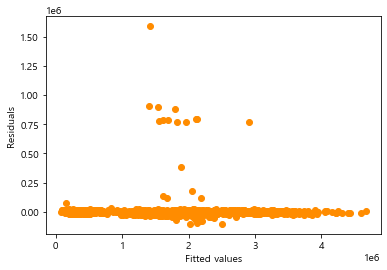

In [515]:
plt.scatter(model_4.fittedvalues, model_4.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

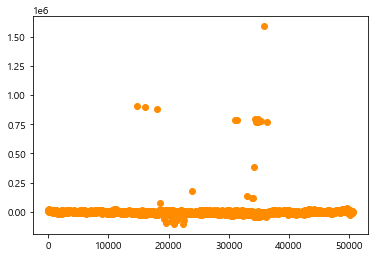

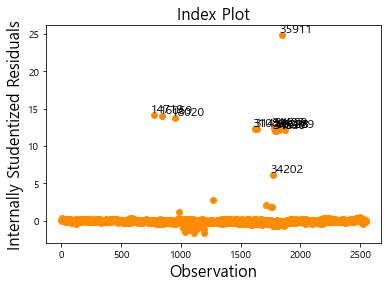

In [516]:
inf4 = OLSInfluence(model_4)
plt.scatter(A4.index, model_4.resid, color = 'darkorange')
inf4.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 그 수가 많고, 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

In [517]:
A4.loc[[35911]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,em_cnt_min_jh,pay_amt_sum_jh,pay_amt_std_jh,...,visit_pop_cnt_3_x_ss,work_pop_cnt_3_x_ss,work_pop_cnt_5_x_ss,work_pop_cnt_22_x_ss,all_y_40_ss,resd_pop_cnt_y_20_ss,visit_pop_cnt_y_40_ss,work_pop_cnt_y_40_ss,resd_pop_cnt_C_ss,work_pop_cnt_C_ss
35911,2020-07-16,성산읍,3013278,-0.142857,-0.260726,-0.277778,-0.33,0.0,-0.046917,0.082659,...,1.139452,0.385719,0.391225,0.322263,0.20828,0.109062,0.303533,0.261565,0.592115,0.21759


#### 영향점 확인

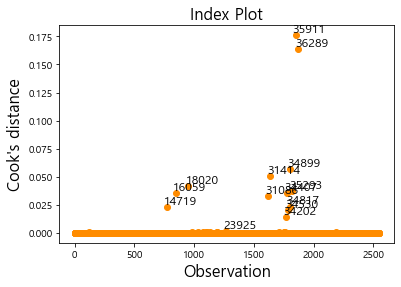

In [518]:
inf4.plot_index('cook',threshold=4/(model_4.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [519]:
A4.loc[[35911,36289]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,em_cnt_min_jh,pay_amt_sum_jh,pay_amt_std_jh,...,visit_pop_cnt_3_x_ss,work_pop_cnt_3_x_ss,work_pop_cnt_5_x_ss,work_pop_cnt_22_x_ss,all_y_40_ss,resd_pop_cnt_y_20_ss,visit_pop_cnt_y_40_ss,work_pop_cnt_y_40_ss,resd_pop_cnt_C_ss,work_pop_cnt_C_ss
35911,2020-07-16,성산읍,3013278,-0.142857,-0.260726,-0.277778,-0.33,0.0,-0.046917,0.082659,...,1.139452,0.385719,0.391225,0.322263,0.20828,0.109062,0.303533,0.261565,0.592115,0.217590
36289,2020-07-25,성산읍,3678114,-0.222222,0.046205,-0.055556,-0.09,0.0,0.743757,1.180593,...,1.186112,0.490290,0.489579,0.321401,0.28102,0.040494,0.605233,-0.029225,0.503503,-0.161014


#### 다중공산성(VIF) 확인

In [520]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A4.columns[3:]), A4, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 152.40930924814575
VIF of em_g_min_jh : 45.458195928055204
VIF of em_cnt_sum_jh : 42.99736006979778
VIF of em_cnt_std_jh : 16.992827679186448
VIF of em_cnt_max_jh : 23.457961727146735
VIF of em_cnt_min_jh : 24.80938628409774
VIF of pay_amt_sum_jh : 26.23097259894526
VIF of pay_amt_std_jh : 13.117879113656064
VIF of pay_amt_max_jh : 11.671347944892009
VIF of pay_amt_min_jh : 23.700887778835245
VIF of ko_male_resid_ks : 1513.7282818753483
VIF of lf_visit_ks : 2.9332021704330344
VIF of AUS_lf_visit_ks : 1.1738701631279875
VIF of CAN_lf_visit_ks : 1.466777265856639
VIF of EGY_lf_visit_ks : 1.0312448126972857
VIF of PAK_lf_visit_ks : 1.1492989910920242
VIF of THA_lf_visit_ks : 1.2895464322389878
VIF of TWN_lf_visit_ks : 1.0908419563220644
VIF of 거주표준편차_sy : 4846.86203666882
VIF of all_5_x_ss : 15865.828393042188
VIF of all_22_x_ss : 575.3010389231902
VIF of all_24_x_ss : 605.8029895667944
VIF of resd_pop_cnt_3_x_ss : 9115.568119186586
VIF of resd_pop_cnt_22_x_ss : 583.903

In [521]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of Intercept : 152.40930924814575 ----Drop
VIF of em_g_min_jh : 45.458195928055204 ----Drop
VIF of em_cnt_sum_jh : 42.99736006979778 ----Drop
VIF of em_cnt_std_jh : 16.992827679186448 ----Drop
VIF of em_cnt_max_jh : 23.457961727146735 ----Drop
VIF of em_cnt_min_jh : 24.80938628409774 ----Drop
VIF of pay_amt_sum_jh : 26.23097259894526 ----Drop
VIF of pay_amt_std_jh : 13.117879113656064 ----Drop
VIF of pay_amt_max_jh : 11.671347944892009 ----Drop
VIF of pay_amt_min_jh : 23.700887778835245 ----Drop
VIF of ko_male_resid_ks : 1513.7282818753483 ----Drop
VIF of 거주표준편차_sy : 4846.86203666882 ----Drop
VIF of all_5_x_ss : 15865.828393042188 ----Drop
VIF of all_22_x_ss : 575.3010389231902 ----Drop
VIF of all_24_x_ss : 605.8029895667944 ----Drop
VIF of resd_pop_cnt_3_x_ss : 9115.568119186586 ----Drop
VIF of resd_pop_cnt_22_x_ss : 583.9039160241098 ----Drop
VIF of visit_pop_cnt_3_x_ss : 1072.9902430313987 ----Drop
VIF of work_pop_cnt_3_x_ss : 461.41736793709924 ----Drop
VIF of work_pop_cnt_5_x_

In [522]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A4.drop(['all_5_x_ss','거주표준편차_sy','all_y_40_ss','all_24_x_ss','resd_pop_cnt_22_x_ss',
                                                   'resd_pop_cnt_3_x_ss','work_pop_cnt_5_x_ss','all_22_x_ss','ko_male_resid_ks',
                                                   'work_pop_cnt_22_x_ss','em_g_min_jh','em_cnt_sum_jh','visit_pop_cnt_y_40_ss',
                                                   'work_pop_cnt_3_x_ss','em_cnt_std_jh'], axis=1).columns[3:]), 
                                           A4.drop(['all_5_x_ss','거주표준편차_sy','all_y_40_ss','all_24_x_ss','resd_pop_cnt_22_x_ss',
                                                   'resd_pop_cnt_3_x_ss','work_pop_cnt_5_x_ss','all_22_x_ss','ko_male_resid_ks',
                                                   'work_pop_cnt_22_x_ss','em_g_min_jh','em_cnt_sum_jh','visit_pop_cnt_y_40_ss',
                                                   'work_pop_cnt_3_x_ss','em_cnt_std_jh'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 22.306134169680917 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [523]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A4 = A4.drop(['all_5_x_ss','거주표준편차_sy','all_y_40_ss','all_24_x_ss','resd_pop_cnt_22_x_ss',
              'resd_pop_cnt_3_x_ss','work_pop_cnt_5_x_ss','all_22_x_ss','ko_male_resid_ks',
              'work_pop_cnt_22_x_ss','em_g_min_jh','em_cnt_sum_jh','visit_pop_cnt_y_40_ss',
              'work_pop_cnt_3_x_ss','em_cnt_std_jh'], axis=1)
A4.shape

(2549, 21)

In [524]:
# 회귀계수로 각 피쳐의 중요도 확인
model4 = smf.ols('em_g_jh~'+"+".join(A4.columns[3:]), data=A4).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.498e+06,6038.010,248.131,0.000,1.49e+06,1.51e+06
em_cnt_max_jh,3748.5312,1.03e+04,0.365,0.715,-1.64e+04,2.39e+04
em_cnt_min_jh,3943.9607,748.507,5.269,0.000,2476.211,5411.711
pay_amt_sum_jh,1.875e+06,4982.341,376.401,0.000,1.87e+06,1.89e+06
pay_amt_std_jh,9394.6996,4890.526,1.921,0.055,-195.143,1.9e+04
pay_amt_max_jh,-1.475e+04,5836.667,-2.527,0.012,-2.62e+04,-3305.545
pay_amt_min_jh,-3007.4763,734.491,-4.095,0.000,-4447.740,-1567.212
lf_visit_ks,789.9785,1110.142,0.712,0.477,-1386.901,2966.858
AUS_lf_visit_ks,3038.9956,2504.215,1.214,0.225,-1871.525,7949.516
CAN_lf_visit_ks,3042.0756,1707.126,1.782,0.075,-305.432,6389.583


In [525]:
A4.to_csv('군집4_feature_corona.csv', index=False)

# A5

#### F검정

In [526]:
model5 = smf.ols('em_g_jh~'+"+".join(A5.columns[3:]), data=A5).fit()
model5.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,2.387e+04
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:20:32,Log-Likelihood:,-28545.
No. Observations:,2554,AIC:,5.810e+04
Df Residuals:,2050,BIC:,6.104e+04
Df Model:,503,,
Covariance Type:,nonrobust,,


#### T검정

In [527]:
A5 = pd.concat([A5.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A5[list(model5.params[model5.pvalues<0.05].index)[3:]]],axis=1)
A5.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(2554, 81)

#### 선형성 확인

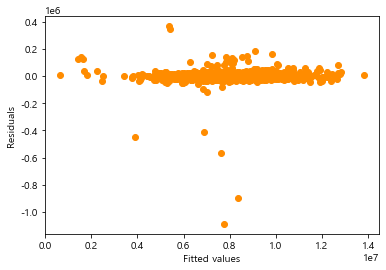

In [528]:
model_5 = smf.ols('em_g_jh~'+"+".join(A5.columns[3:]), data=A5).fit()
plt.scatter(model_5.fittedvalues, model_5.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [529]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A5.iloc[:,3:].values)

array([5.52341410e-01, 2.60579395e+00, 4.52292007e-02, 6.62047725e-01,
       4.00626420e-01, 5.08110662e-02, 7.70157280e-01, 1.82211445e+00,
       1.65099411e+00, 2.58612981e+00, 8.50783680e-02, 7.17007076e-01,
       1.09634202e-01, 5.22793781e-02, 7.13674700e-02, 1.40808441e+00,
       7.04692967e-01, 1.64713814e+00, 1.33216422e+00, 1.45565878e+00,
       8.11714644e-02, 2.11164857e-01, 1.50915818e-01, 9.23779239e-02,
       8.30260090e-01, 7.59632455e-02, 8.06153603e-02, 1.05404897e-01,
       1.41988559e-01, 5.34162411e-02, 3.38170346e-02, 1.15476530e-01,
       4.66854334e-01, 2.15912433e-01, 2.91610594e-01, 1.39308095e+00,
       1.33573494e-01, 1.67597432e-01, 2.19385178e-01, 2.13992757e-01,
       8.00845220e-02, 4.34505136e-02, 2.64669150e-01, 1.66957526e+00,
       1.34430744e+00, 1.30738069e+00, 8.95286021e-01, 1.00260560e+00,
       2.15912433e-01, 4.34508413e-02, 1.33578395e-01, 8.00845220e-02,
       1.15476530e-01, 1.67603451e-01, 4.66873175e-01, 2.91618071e-01,
      

In [530]:
durbin_watson(model_5.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

2.20265587550538

#### 이분산성 확인

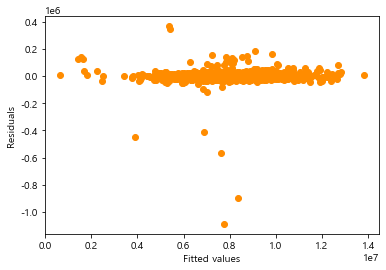

In [531]:
plt.scatter(model_5.fittedvalues, model_5.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성은 없어보임

#### 이상치확인

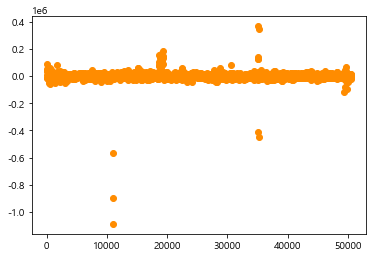

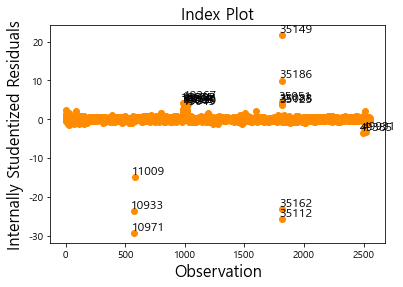

In [532]:
inf5 = OLSInfluence(model_5)
plt.scatter(A5.index, model_5.resid, color = 'darkorange')
inf5.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 그 수가 많고, 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

In [533]:
A5.loc[[35149, 35186, 11009, 10933, 10971, 35162, 35112]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_max_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,pay_amt_sum_jh,pay_amt_mean_jh,...,use_cnt_농축수산물_ss,use_cnt_마트슈퍼마켓_ss,use_cnt_배달_ss,use_cnt_식품_ss,use_cnt_아시아음식_ss,use_cnt_양식_ss,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss,isolClear
35149,2020-06-27,이도2동,5723614,4.600263,-0.158730,0.965897,0.777778,1.42,10.166243,5.417166,...,6.790123,2.155807,6.796875,4.691083,3.839623,4.472727,8.70,3.139303,4.233831,0.592593
35186,2020-06-28,이도2동,5738914,3.670526,-0.206349,1.106711,0.888889,1.33,1.852388,0.098802,...,6.407407,2.881020,7.203125,4.299363,4.320755,4.381818,5.40,3.751244,3.913433,0.592593
11009,2018-10-17,이도2동,7046350,0.442632,0.674603,3.551155,0.444444,1.05,3.403443,0.548902,...,4.716049,3.278565,1.039062,2.515924,2.811321,3.236364,1.75,2.378109,3.322388,0.000000
10933,2018-10-15,이도2동,7479300,0.618947,0.230159,3.810781,0.500000,1.22,3.855935,0.772455,...,5.148148,2.983947,0.921875,2.531847,2.433962,2.436364,4.70,3.044776,3.445771,0.000000
10971,2018-10-16,이도2동,6645100,0.455000,0.126984,3.322332,0.444444,1.10,3.560263,0.626747,...,4.777778,2.547686,0.843750,1.646497,2.716981,1.618182,4.20,2.577114,3.075622,0.000000
35162,2020-06-28,노형동,3429378,8.381200,1.555556,0.160616,0.611111,0.21,0.183154,1.491018,...,3.000000,4.355996,10.242188,4.006369,4.905660,2.890909,8.45,3.313433,4.382090,0.592593
35112,2020-06-26,이도2동,6485314,4.345263,-0.206349,1.202420,0.888889,1.38,10.573914,5.515968,...,6.160494,2.600567,6.398438,4.121019,3.839623,4.290909,6.65,3.368159,4.158209,0.592593


#### 영향점 확인

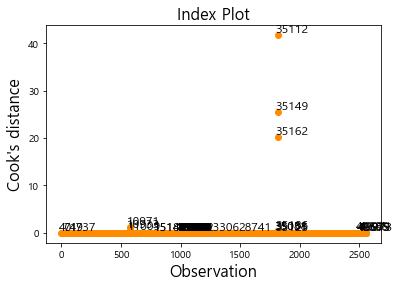

In [534]:
inf5.plot_index('cook',threshold=4/(model_5.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [535]:
A5.loc[[35112, 35149, 35162]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_max_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_std_jh,em_cnt_max_jh,pay_amt_sum_jh,pay_amt_mean_jh,...,use_cnt_농축수산물_ss,use_cnt_마트슈퍼마켓_ss,use_cnt_배달_ss,use_cnt_식품_ss,use_cnt_아시아음식_ss,use_cnt_양식_ss,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss,isolClear
35112,2020-06-26,이도2동,6485314,4.345263,-0.206349,1.202420,0.888889,1.38,10.573914,5.515968,...,6.160494,2.600567,6.398438,4.121019,3.839623,4.290909,6.65,3.368159,4.158209,0.592593
35149,2020-06-27,이도2동,5723614,4.600263,-0.158730,0.965897,0.777778,1.42,10.166243,5.417166,...,6.790123,2.155807,6.796875,4.691083,3.839623,4.472727,8.70,3.139303,4.233831,0.592593
35162,2020-06-28,노형동,3429378,8.381200,1.555556,0.160616,0.611111,0.21,0.183154,1.491018,...,3.000000,4.355996,10.242188,4.006369,4.905660,2.890909,8.45,3.313433,4.382090,0.592593


#### 다중공산성(VIF) 확인

In [536]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A5.columns[3:]), A5, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 0.0
VIF of em_g_max_jh : 28.32981343892269
VIF of em_g_min_jh : 94.78040417075479
VIF of em_cnt_sum_jh : 267.62181845409856
VIF of em_cnt_std_jh : 99.91895345903397
VIF of em_cnt_max_jh : 54.390272239685174
VIF of pay_amt_sum_jh : 188.9561708858571
VIF of pay_amt_mean_jh : 313.2435695646697
VIF of pay_amt_std_jh : 693.9021371616614
VIF of pay_amt_max_jh : 794.3191667499391
VIF of pay_amt_min_jh : 94.68553564576847
VIF of 한회평균배출량_jh : 57.22729476808524
VIF of 한회평균지불금액_jh : 238.2155677458821
VIF of 배출거점지역종류_jh : 102.62564822796354
VIF of use_cnt_sum_jh : inf
VIF of use_amt_sum_jh : inf
VIF of lf_visit_ks : 31.417443318745182
VIF of UZB_lf_resid_ks : 1.509541486775392
VIF of GBR_lf_work_ks : 1.4867702880866966
VIF of DEU_lf_visit_ks : 1.0647873532709216
VIF of KHM_lf_visit_ks : 1.2347255652714968
VIF of 간식_cnt_ks : inf
VIF of 농축수산물_cnt_ks : inf
VIF of 슈퍼마켓_cnt_ks : inf
VIF of 배달_cnt_ks : inf
VIF of 부페_cnt_ks : inf
VIF of 식품_cnt_ks : inf
VIF of 아시아음식_cnt_ks : inf
VIF of 

In [537]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print( 'VIF of', x, ':', variance_inflation_factor(X, i))
print(len(drop_columns))

VIF of Intercept : 0.0
VIF of em_g_max_jh : 28.32981343892269 ----Drop
VIF of em_g_min_jh : 94.78040417075479 ----Drop
VIF of em_cnt_sum_jh : 267.62181845409856 ----Drop
VIF of em_cnt_std_jh : 99.91895345903397 ----Drop
VIF of em_cnt_max_jh : 54.390272239685174 ----Drop
VIF of pay_amt_sum_jh : 188.9561708858571 ----Drop
VIF of pay_amt_mean_jh : 313.2435695646697 ----Drop
VIF of pay_amt_std_jh : 693.9021371616614 ----Drop
VIF of pay_amt_max_jh : 794.3191667499391 ----Drop
VIF of pay_amt_min_jh : 94.68553564576847 ----Drop
VIF of 한회평균배출량_jh : 57.22729476808524 ----Drop
VIF of 한회평균지불금액_jh : 238.2155677458821 ----Drop
VIF of 배출거점지역종류_jh : 102.62564822796354 ----Drop
VIF of use_cnt_sum_jh : inf ----Drop
VIF of use_amt_sum_jh : inf ----Drop
VIF of lf_visit_ks : 31.417443318745182 ----Drop
VIF of UZB_lf_resid_ks : 1.509541486775392
VIF of GBR_lf_work_ks : 1.4867702880866966
VIF of DEU_lf_visit_ks : 1.0647873532709216
VIF of KHM_lf_visit_ks : 1.2347255652714968
VIF of 간식_cnt_ks : inf ----Drop


In [538]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A5.drop(['use_amt_sum_jh','use_cnt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
                                                   '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
                                                   '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
                                                   '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks','아시아음식_amt_ks',
                                                   '양식_amt_ks','패스트푸드_amt_ks','한식_amt_ks','all_12_y_ss','pay_amt_max_jh',
                                                   'pay_amt_mean_jh','한회평균지불금액_jh','em_cnt_sum_jh','장기방문표준편차_sy',
                                                   'work_pop_cnt_14_x_ss','거주합계_diff_sy','em_g_min_jh','visit_pop_cnt_12_y_ss',
                                                   'em_cnt_std_jh','pay_amt_sum_jh','lf_visit_ks','resd_pop_cnt_12_y_ss',
                                                   'work_pop_cnt_12_y_ss','use_cnt_마트슈퍼마켓_ss','visit_pop_cnt_13_y_ss',
                                                   'use_cnt_배달_ss'], axis=1).columns[3:]), 
                                           A5.drop(['use_amt_sum_jh','use_cnt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
                                                   '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
                                                   '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
                                                   '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks','아시아음식_amt_ks',
                                                   '양식_amt_ks','패스트푸드_amt_ks','한식_amt_ks','all_12_y_ss','pay_amt_max_jh',
                                                   'pay_amt_mean_jh','한회평균지불금액_jh','em_cnt_sum_jh','장기방문표준편차_sy',
                                                   'work_pop_cnt_14_x_ss','거주합계_diff_sy','em_g_min_jh','visit_pop_cnt_12_y_ss',
                                                   'em_cnt_std_jh','pay_amt_sum_jh','lf_visit_ks','resd_pop_cnt_12_y_ss',
                                                   'work_pop_cnt_12_y_ss','use_cnt_마트슈퍼마켓_ss','visit_pop_cnt_13_y_ss',
                                                   'use_cnt_배달_ss'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 623.5415750194202 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [539]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A5 = A5.drop(['use_amt_sum_jh','use_cnt_sum_jh','간식_cnt_ks','농축수산물_cnt_ks',
              '슈퍼마켓_cnt_ks','배달_cnt_ks','식품_cnt_ks','아시아음식_cnt_ks','양식_cnt_ks',
              '주점및주류판매_cnt_ks','패스트푸드_cnt_ks','한식_cnt_ks','간식_amt_ks',
              '농축수산물_amt_ks','슈퍼마켓_amt_ks','배달_amt_ks','식품_amt_ks','아시아음식_amt_ks',
              '양식_amt_ks','패스트푸드_amt_ks','한식_amt_ks','all_12_y_ss','pay_amt_max_jh',
              'pay_amt_mean_jh','한회평균지불금액_jh','em_cnt_sum_jh','장기방문표준편차_sy',
              'work_pop_cnt_14_x_ss','거주합계_diff_sy','em_g_min_jh','visit_pop_cnt_12_y_ss',
              'em_cnt_std_jh','pay_amt_sum_jh','lf_visit_ks','resd_pop_cnt_12_y_ss',
              'work_pop_cnt_12_y_ss','use_cnt_마트슈퍼마켓_ss','visit_pop_cnt_13_y_ss',
              'use_cnt_배달_ss'], axis=1)
A5.shape

(2554, 42)

In [540]:
# 회귀계수로 각 피쳐의 중요도 확인
model5 = smf.ols('em_g_jh~'+"+".join(A5.columns[3:]), data=A5).fit()
model5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.686e+05,1.24e+05,-7.027,0.000,-1.11e+06,-6.26e+05
em_g_max_jh,5.776e+04,1.77e+04,3.262,0.001,2.3e+04,9.25e+04
em_cnt_max_jh,-3.657e+04,1.25e+04,-2.929,0.003,-6.11e+04,-1.21e+04
pay_amt_std_jh,-4.319e+04,4649.025,-9.291,0.000,-5.23e+04,-3.41e+04
pay_amt_min_jh,-5.723e+04,2.16e+04,-2.654,0.008,-9.95e+04,-1.49e+04
한회평균배출량_jh,4.333e+06,5.89e+04,73.613,0.000,4.22e+06,4.45e+06
배출거점지역종류_jh,3.678e+06,3.99e+04,92.244,0.000,3.6e+06,3.76e+06
UZB_lf_resid_ks,-1.573e+04,5148.568,-3.055,0.002,-2.58e+04,-5635.429
GBR_lf_work_ks,8968.0541,4820.916,1.860,0.063,-485.320,1.84e+04
DEU_lf_visit_ks,3004.2348,7919.757,0.379,0.704,-1.25e+04,1.85e+04


In [541]:
A5.to_csv('군집5_feature_corona.csv', index=False)

# A6

#### F검정

In [542]:
model6 = smf.ols('em_g_jh~'+"+".join(A6.columns[3:]), data=A6).fit()
model6.summary().tables[0]
# F값에 대한 p-value가 0.00으로 0.05보다 작기 때문에 해당 회귀 모형은 유의함

Dep. Variable:,em_g_jh,R-squared:,1.000
Model:,OLS,Adj. R-squared:,1.000
Method:,Least Squares,F-statistic:,3.063e+07
Date:,"Wed, 15 Sep 2021",Prob (F-statistic):,0.00
Time:,06:21:12,Log-Likelihood:,-23938.
No. Observations:,3314,AIC:,4.896e+04
Df Residuals:,2774,BIC:,5.225e+04
Df Model:,539,,
Covariance Type:,nonrobust,,


#### T검정

In [543]:
A6 = pd.concat([A6.loc[:,['base_date_jh','emd_nm_jh','em_g_jh']]
                 ,A6[list(model6.params[model6.pvalues<0.05].index)[3:]]],axis=1)
A6.shape
# T값의 p-value가 0.05보다 큰 변수 제거

(3314, 70)

#### 선형성 확인

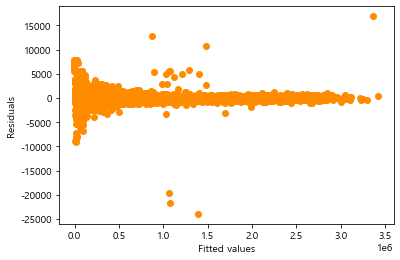

In [544]:
model_6 = smf.ols('em_g_jh~'+"+".join(A6.columns[3:]), data=A6).fit()
plt.scatter(model_6.fittedvalues, model_6.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 비선형성은 없어 보임

#### 오차의 상관성 확인(자기상관 - Durbin Watson)

In [545]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(A6.iloc[:,3:].values)

array([1.54882966e+00, 1.33786265e+00, 7.61701008e-02, 1.59822542e+00,
       4.39088861e-01, 1.54719512e+00, 1.28960588e+00, 1.28437116e+00,
       2.57876218e+00, 2.39337955e+00, 2.07525578e+00, 2.49446748e+00,
       2.13459848e+00, 1.59620467e+00,            nan, 2.00000000e+00,
       1.87402393e+00, 1.71759017e+00, 1.24480534e+00, 1.78852924e+00,
       1.87017804e+00, 1.95367892e+00, 9.45832823e-02, 6.33085570e-01,
       1.87132816e+00,            nan, 2.39005429e+00, 2.09464984e+00,
       1.92006629e+00, 2.46506402e+00, 2.05722946e+00, 2.52318587e+00,
       2.54108690e+00, 2.20340153e+00, 1.95546840e+00, 2.18212974e+00,
       2.22396214e+00, 2.26906768e+00, 1.39440487e+00, 2.04061201e+00,
       2.33816422e+00, 2.30306755e+00, 2.37951561e+00, 2.40889496e+00,
       2.33230385e+00, 2.18690009e+00, 2.29519625e+00, 1.59606697e+00,
       1.52013210e+00, 1.47311840e+00, 1.33505334e+00, 1.33627299e+00,
       1.64926930e+00, 1.51762934e+00, 1.88794979e+00, 1.80729426e+00,
      

In [546]:
durbin_watson(model_6.resid)
# 모델의 durbin_waston값이 2에 가까우므로 자기상관이 거의 없다고 판단됨

2.05440606736692

#### 이분산성 확인

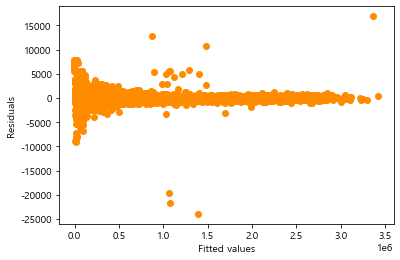

In [547]:
plt.scatter(model_6.fittedvalues, model_6.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 이분산성이 있어보임

In [548]:
# y값에 log를 취해주어 이분산성을 없애줌
A6[['em_g_jh']] = np.log1p(A6.em_g_jh)
A6.head()

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_max_jh,pay_amt_sum_jh,pay_amt_max_jh,pay_amt_min_jh,한회평균배출량_jh,...,use_cnt_농축수산물_ss,use_cnt_마트슈퍼마켓_ss,use_cnt_배달_ss,use_cnt_식품_ss,use_cnt_아시아음식_ss,use_cnt_양식_ss,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss,코로나확진자합계_전국
17,2018-01-01,알수없음,12.896594,6.833333,-0.569857,-0.50,-0.574702,0.090065,6.914439,5.461396,...,-0.604938,-0.507082,-0.359375,-0.643312,-0.603774,-0.454545,-0.50,-0.412935,-0.523383,0.0
55,2018-01-02,알수없음,12.512089,10.507937,-0.572057,-0.51,-0.643187,-0.477218,10.609626,3.397357,...,-0.543210,-0.483475,-0.359375,-0.675159,-0.462264,-0.545455,-0.25,-0.606965,-0.542289,0.0
93,2018-01-03,알수없음,12.617026,5.301587,-0.579758,-0.57,-0.626993,-0.098558,5.358289,5.234630,...,-0.481481,-0.521246,-0.359375,-0.691083,-0.650943,-0.454545,-0.50,-0.507463,-0.567164,0.0
131,2018-01-04,알수없음,12.577122,2.452381,-0.585259,-0.58,-0.633299,0.022118,2.486631,6.211016,...,-0.543210,-0.547686,-0.359375,-0.611465,-0.650943,-0.454545,-0.50,-0.557214,-0.538308,0.0
169,2018-01-05,알수없음,12.441741,5.611111,-0.576458,-0.58,-0.653022,-0.200832,5.668449,3.597883,...,-0.666667,-0.474032,-0.320312,-0.659236,-0.509434,-0.454545,-0.50,-0.507463,-0.538308,0.0


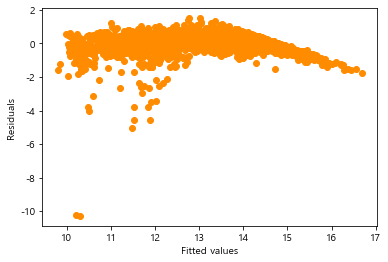

In [549]:
# 로그를 취한 후 이분산성의 문제가 없어졌는지 시각화 해본 결과 이분산성 문제가 완화됨
model_6 = smf.ols('em_g_jh~'+"+".join(A6.columns[3:]), data=A6).fit()
plt.scatter(model_6.fittedvalues, model_6.resid, color = 'darkorange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#### 이상치확인

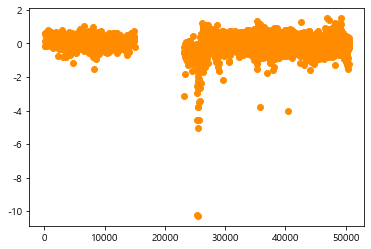

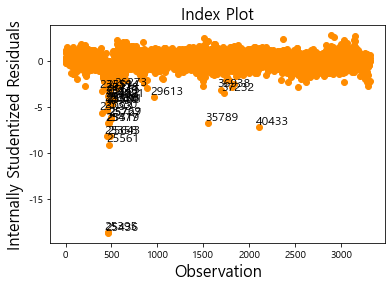

In [550]:
# 모든 피쳐의 VIF값을 출력
inf6 = OLSInfluence(model_6)
plt.scatter(A6.index, model_6.resid, color = 'darkorange')
inf6.plot_index('resid', threshold=3, color = 'darkorange')
plt.show()
# 이상치가 있지만 그 수가 매우 많고, 시계열의 특성상 이상치를 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음

#### 영향점 확인

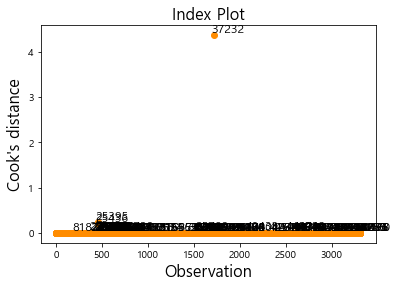

In [551]:
inf6.plot_index('cook',threshold=4/(model_6.nobs-2-1), color = 'darkorange')
plt.show()
# 시계열의 특성상 영향점을 없애거나 수정하는 것보다 그대로 두는 것이 낫다고 판단되어 제거는 하지 않음.

In [552]:
A6.loc[[37232]]

,base_date_jh,emd_nm_jh,em_g_jh,em_g_min_jh,em_cnt_sum_jh,em_cnt_max_jh,pay_amt_sum_jh,pay_amt_max_jh,pay_amt_min_jh,한회평균배출량_jh,...,use_cnt_농축수산물_ss,use_cnt_마트슈퍼마켓_ss,use_cnt_배달_ss,use_cnt_식품_ss,use_cnt_아시아음식_ss,use_cnt_양식_ss,use_cnt_주점및주류판매_ss,use_cnt_패스트푸드_ss,use_cnt_한식_ss,코로나확진자합계_전국
37232,2020-08-16,조천읍,15.034213,-0.246032,0.517052,-0.32,0.746552,-0.433867,-0.240642,0.654169,...,0.91358,0.326723,1.0,2.531847,0.896226,1.036364,0.5,0.920398,0.899502,0.749083


#### 다중공산성(VIF) 확인

In [553]:
# 모든 피쳐의 VIF값을 출력
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A6.columns[3:]), A6, return_type='matrix')
                  
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 0.0
VIF of em_g_min_jh : 337648.2945641134
VIF of em_cnt_sum_jh : 70.17005702840764
VIF of em_cnt_max_jh : 8.967159902562235
VIF of pay_amt_sum_jh : 67.31742542751549
VIF of pay_amt_max_jh : 6.302960438073463
VIF of pay_amt_min_jh : 337423.4340904993
VIF of 한회평균배출량_jh : 67837.73368941879
VIF of 한회평균지불금액_jh : 67860.92671294017
VIF of use_cnt_sum_jh : inf
VIF of use_cnt_std_jh : 125497.99837448192
VIF of use_cnt_min_jh : 2.6777632551577595
VIF of use_amt_sum_jh : inf
VIF of use_amt_max_jh : 30.682456334379896
VIF of IND_lf_resid_ks : 1.8575658935481434
VIF of MYS_lf_resid_ks : nan
VIF of FRA_lf_work_ks : 1.1318743755445393
VIF of PHL_lf_work_ks : 1.6237226360533779
VIF of CHN_lf_visit_ks : 7.4760189385514115
VIF of NZL_lf_visit_ks : 1.7433089787234355
VIF of PAK_lf_visit_ks : 1.650865336141627
VIF of 부페_cnt_ks : 4503599627370496.0
VIF of 부페_amt_ks : inf
VIF of em_cnt_ks : 14.860709250610602
VIF of pay_amt_ks : 20.760189044952607
VIF of 근무분산_sy : 13.539613609183906
VIF 

In [554]:
# VIF값이 10 이상인 피쳐들을 출력

drop_columns=[]
for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        drop_columns.append(x)
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
print(len(drop_columns))

VIF of em_g_min_jh : 337648.2945641134 ----Drop
VIF of em_cnt_sum_jh : 70.17005702840764 ----Drop
VIF of pay_amt_sum_jh : 67.31742542751549 ----Drop
VIF of pay_amt_min_jh : 337423.4340904993 ----Drop
VIF of 한회평균배출량_jh : 67837.73368941879 ----Drop
VIF of 한회평균지불금액_jh : 67860.92671294017 ----Drop
VIF of use_cnt_sum_jh : inf ----Drop
VIF of use_cnt_std_jh : 125497.99837448192 ----Drop
VIF of use_amt_sum_jh : inf ----Drop
VIF of use_amt_max_jh : 30.682456334379896 ----Drop
VIF of 부페_cnt_ks : 4503599627370496.0 ----Drop
VIF of 부페_amt_ks : inf ----Drop
VIF of em_cnt_ks : 14.860709250610602 ----Drop
VIF of pay_amt_ks : 20.760189044952607 ----Drop
VIF of 근무분산_sy : 13.539613609183906 ----Drop
VIF of 금액표준편차_sy : 119974.66543963873 ----Drop
VIF of 슈퍼마켓_sy : inf ----Drop
VIF of 한식_sy : inf ----Drop
VIF of 식품_sy : inf ----Drop
VIF of 패스트푸드_sy : inf ----Drop
VIF of 간식_sy : inf ----Drop
VIF of 아시아음식_sy : inf ----Drop
VIF of 농축수산물_sy : inf ----Drop
VIF of 배달_sy : inf ----Drop
VIF of 양식_sy : inf ----Dro

In [555]:
# VIF값이 가장 높은 피쳐부터 차례로 제거하면서 VIF값이 모두 10이하가 될 때까지 반복
y, X = patsy.dmatrices('em_g_jh~'+"+".join(A6.drop(['use_cnt_sum_jh','use_amt_sum_jh','all_8_y_ss','pay_amt_min_jh',
                                                   '금액표준편차_sy','한회평균지불금액_jh','all_제주_x_ss','use_cnt_std_jh',
                                                   'resd_pop_cnt_24_x_ss','resd_pop_cnt_6_y_ss','all_6_y_ss','work_pop_cnt_22_x_ss',
                                                   'work_pop_cnt_20_x_ss','resd_pop_cnt_20_x_ss','em_cnt_sum_jh','use_cnt_한식_ss',
                                                   'work_pop_cnt_8_y_ss','use_cnt_마트슈퍼마켓_ss','use_cnt_패스트푸드_ss',
                                                   'use_cnt_식품_ss','use_cnt_배달_ss','work_pop_cnt_24_x_ss','use_amt_max_jh',
                                                   'work_pop_cnt_y_40_ss','pay_amt_ks','use_cnt_간식_ss','resd_pop_cnt_8_y_ss',
                                                   'visit_pop_cnt_제주_x_ss','한식_sy','use_cnt_아시아음식_ss'], axis=1).columns[3:]), 
                                           A6.drop(['use_cnt_sum_jh','use_amt_sum_jh','all_8_y_ss','pay_amt_min_jh',
                                                   '금액표준편차_sy','한회평균지불금액_jh','all_제주_x_ss','use_cnt_std_jh',
                                                   'resd_pop_cnt_24_x_ss','resd_pop_cnt_6_y_ss','all_6_y_ss','work_pop_cnt_22_x_ss',
                                                   'work_pop_cnt_20_x_ss','resd_pop_cnt_20_x_ss','em_cnt_sum_jh','use_cnt_한식_ss',
                                                   'work_pop_cnt_8_y_ss','use_cnt_마트슈퍼마켓_ss','use_cnt_패스트푸드_ss',
                                                   'use_cnt_식품_ss','use_cnt_배달_ss','work_pop_cnt_24_x_ss','use_amt_max_jh',
                                                   'work_pop_cnt_y_40_ss','pay_amt_ks','use_cnt_간식_ss','resd_pop_cnt_8_y_ss',
                                                   'visit_pop_cnt_제주_x_ss','한식_sy','use_cnt_아시아음식_ss'], axis=1), return_type='matrix')

for i, x in enumerate(X.design_info.column_names):
    if variance_inflation_factor(X, i) > 10: # 5로 바꿔도 됨
        print( 'VIF of', x, ':', variance_inflation_factor(X, i),'----Drop')
    else:
        print('pass')
# 절편은 VIF값을 구하지 않아도 되니 무시한다.

VIF of Intercept : 62.24600698724113 ----Drop
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
VIF of visit_pop_cnt_6_y_ss : 37.30177909960883 ----Drop
VIF of visit_pop_cnt_8_y_ss : 44.297691782119216 ----Drop
pass
pass
pass
pass
pass


In [556]:
# VIF값이 높은 피쳐가 모두 제거된 최종피쳐
A6 = A6.drop(['use_cnt_sum_jh','use_amt_sum_jh','all_8_y_ss','pay_amt_min_jh',
              '금액표준편차_sy','한회평균지불금액_jh','all_제주_x_ss','use_cnt_std_jh',
              'resd_pop_cnt_24_x_ss','resd_pop_cnt_6_y_ss','all_6_y_ss','work_pop_cnt_22_x_ss',
              'work_pop_cnt_20_x_ss','resd_pop_cnt_20_x_ss','em_cnt_sum_jh','use_cnt_한식_ss',
              'work_pop_cnt_8_y_ss','use_cnt_마트슈퍼마켓_ss','use_cnt_패스트푸드_ss',
              'use_cnt_식품_ss','use_cnt_배달_ss','work_pop_cnt_24_x_ss','use_amt_max_jh',
              'work_pop_cnt_y_40_ss','pay_amt_ks','use_cnt_간식_ss','resd_pop_cnt_8_y_ss',
              'visit_pop_cnt_제주_x_ss','한식_sy','use_cnt_아시아음식_ss'], axis=1)
A6.shape

(3314, 40)

In [557]:
# 회귀계수로 각 피쳐의 중요도 확인
model6 = smf.ols('em_g_jh~'+"+".join(A6.columns[3:]), data=A6).fit()
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,15.4435,0.091,169.631,0.000,15.265,15.622
em_g_min_jh,-0.0299,0.007,-4.582,0.000,-0.043,-0.017
em_cnt_max_jh,5.4819,0.293,18.715,0.000,4.908,6.056
pay_amt_sum_jh,1.7198,0.082,20.854,0.000,1.558,1.881
pay_amt_max_jh,0.6443,0.069,9.320,0.000,0.509,0.780
한회평균배출량_jh,0.0956,0.014,6.879,0.000,0.068,0.123
use_cnt_min_jh,0.0155,0.015,1.050,0.294,-0.013,0.044
IND_lf_resid_ks,0.0254,0.006,4.463,0.000,0.014,0.037
MYS_lf_resid_ks,2.771e-10,1.27e-11,21.826,0.000,2.52e-10,3.02e-10
FRA_lf_work_ks,0.0256,0.033,0.768,0.442,-0.040,0.091


In [558]:
A6.to_csv('군집6_feature_corona.csv', index=False)